<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MNIST-Dataset-Classification-with-K-Nearest-Neighbors" data-toc-modified-id="MNIST-Dataset-Classification-with-K-Nearest-Neighbors-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MNIST Dataset Classification with <strong><em>K-Nearest Neighbors</em></strong></a></span></li><li><span><a href="#Image-Compression-with-Principal-Component-Analysis" data-toc-modified-id="Image-Compression-with-Principal-Component-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Image Compression with <strong><em>Principal Component Analysis</em></strong></a></span></li><li><span><a href="#Image-Classification-with-Logistic-Regression-&amp;-Linear-Discriminant-Analysis" data-toc-modified-id="Image-Classification-with-Logistic-Regression-&amp;-Linear-Discriminant-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Image Classification with <strong><em>Logistic Regression</em></strong> &amp; <strong><em>Linear Discriminant Analysis</em></strong></a></span></li><li><span><a href="#Moore's-Law-Verification-with-Linear-Regression" data-toc-modified-id="Moore's-Law-Verification-with-Linear-Regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Moore's Law Verification with <strong><em>Linear Regression</em></strong></a></span></li><li><span><a href="#Loan-Amount-Optimization-with-a-Hybrid-Model" data-toc-modified-id="Loan-Amount-Optimization-with-a-Hybrid-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Loan Amount Optimization with a <strong><em>Hybrid Model</em></strong></a></span></li><li><span><a href="#CO$_2$-Concentration-Forecasting-with-Gaussian-Processes" data-toc-modified-id="CO$_2$-Concentration-Forecasting-with-Gaussian-Processes-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>CO$_2$ Concentration Forecasting with <strong><em>Gaussian Processes</em></strong></a></span></li><li><span><a href="#Temperature-Modeling-with-Parametric-Linear-Regression" data-toc-modified-id="Temperature-Modeling-with-Parametric-Linear-Regression-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Temperature Modeling with <strong><em>Parametric Linear Regression</em></strong></a></span></li><li><span><a href="#Classification-of-Linearly-Inseparable-Data-with-Support-Vector-Machines" data-toc-modified-id="Classification-of-Linearly-Inseparable-Data-with-Support-Vector-Machines-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Classification of Linearly Inseparable Data with <strong><em>Support Vector Machines</em></strong></a></span></li><li><span><a href="#Associative-Memory-with-Hopfield-Recurrent-Neural-Network" data-toc-modified-id="Associative-Memory-with-Hopfield-Recurrent-Neural-Network-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Associative Memory with <strong><em>Hopfield Recurrent Neural Network</em></strong></a></span></li><li><span><a href="#Fraud-Detection-with-Kernel-Density-Estimation" data-toc-modified-id="Fraud-Detection-with-Kernel-Density-Estimation-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Fraud Detection with <strong><em>Kernel Density Estimation</em></strong></a></span></li><li><span><a href="#Topic-Modeling-with-Latent-Dirchlet-Allocation" data-toc-modified-id="Topic-Modeling-with-Latent-Dirchlet-Allocation-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Topic Modeling with <strong><em>Latent Dirchlet Allocation</em></strong></a></span></li><li><span><a href="#Image-Classification-with-Deep-Learning" data-toc-modified-id="Image-Classification-with-Deep-Learning-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Image Classification with <strong><em>Deep Learning</em></strong></a></span></li><li><span><a href="#Language-Processing-with-Markov-Chains-&amp;-Hidden-Markov-Models" data-toc-modified-id="Language-Processing-with-Markov-Chains-&amp;-Hidden-Markov-Models-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Language Processing with <strong><em>Markov Chains &amp; Hidden Markov Models</em></strong></a></span></li><li><span><a href="#Musical-Key-Detection-with-Maximum-Likelihood-Estimation" data-toc-modified-id="Musical-Key-Detection-with-Maximum-Likelihood-Estimation-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Musical Key Detection with <strong><em>Maximum Likelihood Estimation</em></strong></a></span></li></ul></div>

# MNIST Dataset Classification with **_K-Nearest Neighbors_**

## Preparing the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, f1_score, confusion_matrix
from sklearn.datasets import load_digits
import statsmodels.api as sm

In [2]:
# load the data
digits = load_digits(as_frame=True)

In [3]:
chosen_digits = (0, 1, 2, 3, 4, 5, 7, 8, 9)

chosen_digits_mask = digits.target.isin(chosen_digits)

chosen_digits_images = digits.images[chosen_digits_mask]
y = digits.target[chosen_digits_mask].values
x = digits.data[chosen_digits_mask].values

## Examples of Digits

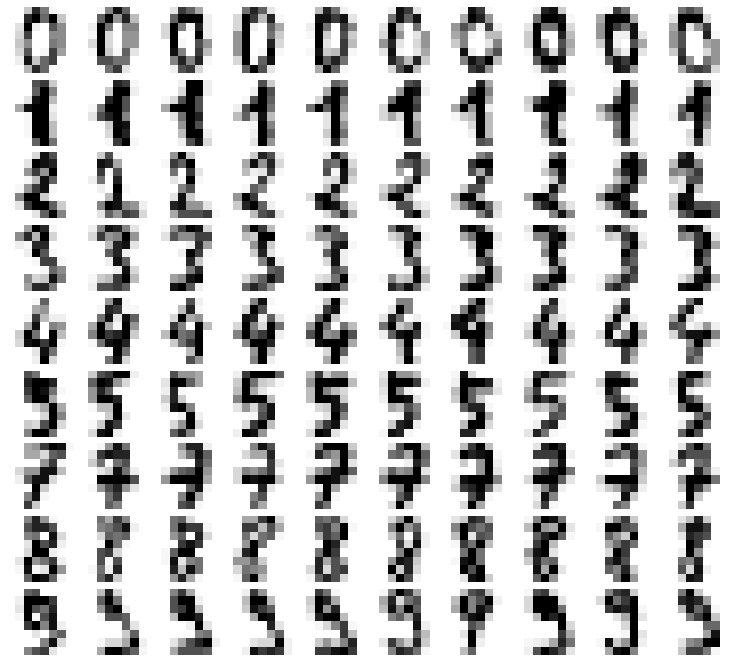

In [4]:
examples_per_digit = 10
fig, axes = plt.subplots(len(chosen_digits), examples_per_digit, figsize=(examples_per_digit, len(chosen_digits)))

for i in range(len(chosen_digits)):
    for j in range(examples_per_digit):
        axes[i, j].imshow(digits.images[digits.target == chosen_digits[i]][j], cmap='Greys')
        axes[i, j].axis('off')

plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0.1, wspace=0.1)
plt.show()

## Training the Model

In [5]:
classifier = KNeighborsClassifier

param_grid = {
    'n_neighbors': [1, 3, 5, 10, 25],
}

In [6]:
x_train, x_test, y_train, y_test, img_train, img_test = train_test_split(x, y, chosen_digits_images)

model = classifier()

grid_search = GridSearchCV(model, n_jobs=4, param_grid=param_grid, verbose=5)
grid_search.fit(x_train, y_train)

print('Best params:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best params: {'n_neighbors': 1}
Best score: 0.988446757133626


## Results

In [7]:
model = classifier(**grid_search.best_params_).fit(x_train, y_train)
y_pred = model.predict(x_test)
print('F-1 Score:', f1_score(y_test, y_pred, average='micro'))

F-1 Score: 0.9876237623762376


### Misclassified Digits

In [8]:
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             index=pd.Series(chosen_digits, name='True'),
             columns=pd.Series(chosen_digits, name='Pred'))

Pred   0   1   2   3   4   5   7   8   9
True                                    
0     42   0   0   0   0   0   0   0   0
1      0  44   0   0   0   0   0   0   0
2      0   0  40   0   0   0   0   0   0
3      0   0   0  51   0   0   0   0   0
4      0   0   0   0  37   0   0   0   0
5      0   0   0   0   0  57   0   0   1
7      0   0   0   0   0   0  46   0   0
8      0   1   0   0   0   0   0  41   0
9      0   1   0   1   1   0   0   0  41

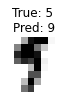

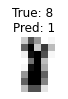

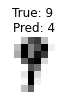

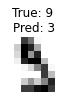

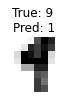

In [9]:
misclassified_inds = np.arange(len(y_pred))[y_test != y_pred]

for idx in misclassified_inds:
    plt.figure(figsize=(1, 1))
    plt.imshow(img_test[idx], cmap='Greys')
    plt.title(f'True: {y_test[idx]} \nPred: {y_pred[idx]}', {'size': 12})
    plt.axis('off')
    plt.subplots_adjust(top=None, bottom=None, right=1, left=0)
    plt.show()

# Image Compression with **_Principal Component Analysis_**

## Importing the Images

The original recording contains over 150 images of Seoul city skyline at sunset, but since most of them are very similar to each other, we will be using just 28 of them.

In [1]:
from os import listdir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from sklearn.decomposition import PCA
from sklearn.preprocessing import minmax_scale
from PIL import Image

In [2]:
img_folder = "img/"
target_im_size = (512, 288)


def get_img_datas(folder, im_size=(256, 144)):
    """
    Reads all images found in `folder`, resizes them to fit into `im_size`,
    and convert to a normalized (0-1) list of rgb values of length `im_size[0] * im_size[1] * 3`
    i.e., [r00, r01, r02, ... g00, g01, ... b00, ...].
    Note: .png files will also have an vector of alpha values resulting in total length of `im_size[0] * im_size[1] * 4`
    """
    return np.array([
        (np.array(Image.open(folder + im_file)
                  .resize(im_size)
                  .getdata()) / 255  # convert to floats between 0 and 1
         ).flatten()  # append rgb values next to each other into one big 1-d array
        for im_file in listdir(folder)])


def get_img_from_data(im_data: np.array, im_size=target_im_size) -> Image:
    """
    Returns an image object from the given image data
    :param im_data: a 1d array of unstacked normalized rgb values (returned by `get_img_datas`)
    """
    im = Image.new('RGB', im_size)
    im.putdata(list(map(tuple,  # have to convert to tuples for some reason (otherwise gives an error)
                        (im_data.reshape((-1,  # reshape into 1 by 3 or 4 (rgb or rgba)
                                          len(im_data) // np.multiply(*im_size))) * 255).astype(int))))
    return im


def get_img_artist(img_data, loc=(0, 0), zoom=0.1, **kwargs):
    """
    Returns an artist object from the given image data to insert into a matplotlib plot
    """
    return AnnotationBbox(OffsetImage(get_img_from_data(img_data), zoom=zoom), xy=loc,
                          pad=0, **kwargs)

In [3]:
imgs = get_img_datas(img_folder, target_im_size)

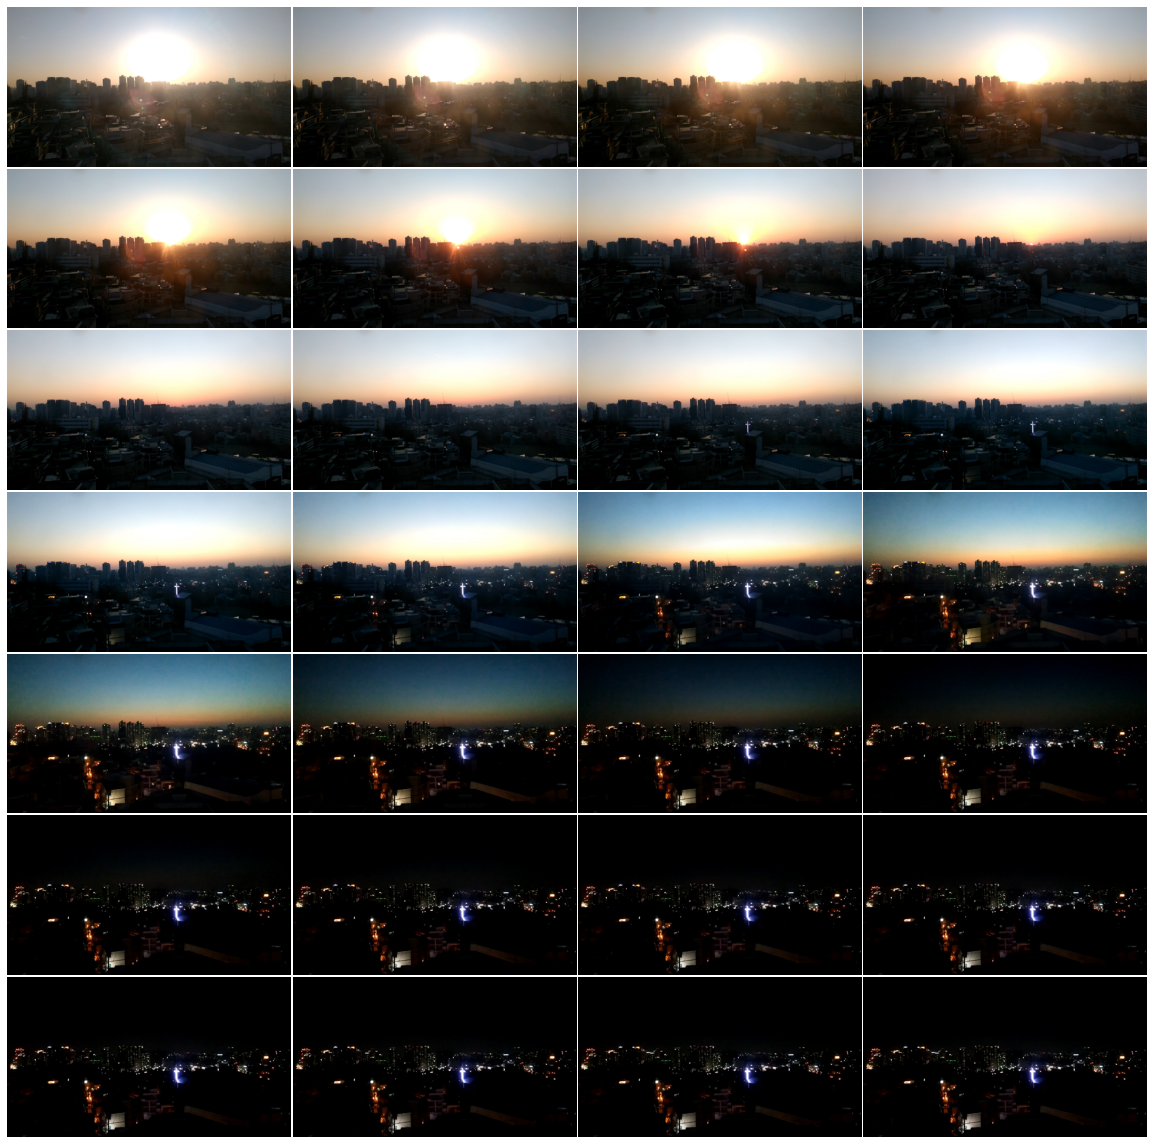

In [4]:
imgs_per_row = 4
img_scale = 4

imgs_per_col = len(imgs) // imgs_per_row
figsize = (img_scale * imgs_per_row,
           img_scale * target_im_size[1] / target_im_size[0] * imgs_per_col)
fig, axes = plt.subplots(imgs_per_col, imgs_per_row, figsize=figsize)

for i in range(imgs_per_col):
    for j in range(imgs_per_row):
        axes[i, j].imshow(get_img_from_data(imgs[i * imgs_per_row + j]))
        axes[i, j].axis('off')

fig.tight_layout(pad=0.2)
plt.show()

## PCA

Since we're aiming to plot the images on a 2D graph, we should set the number of components for the PCA to be 2:

In [5]:
pca = PCA(2)
pca.fit(imgs)

PCA(n_components=2)

### Visualizing Components

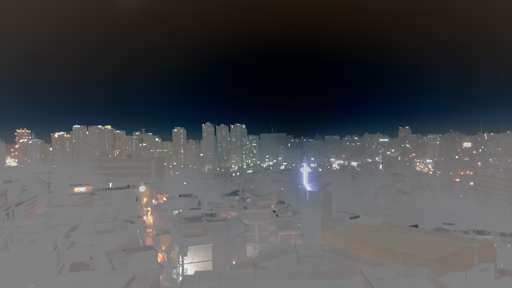

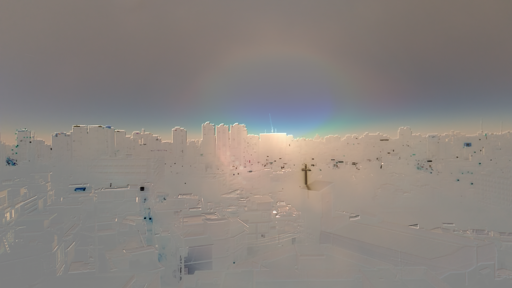

In [6]:
from IPython.display import display

for i in range(min(pca.n_components_, 10)):
    display(get_img_from_data(minmax_scale(pca.components_[i])))

As we can see, the PCA picked up on the two distinct types of pictures: taken before and after the sunset. PC1 most likley corresponds to pictures taken after the sunset since, as we can see, the sky is dark and the cross (located in the center of the picture that gets turned on at night) is very bright, while on PC2 we can see the bright sky with a glowing halo from the sun and a dark cross.

### Reconstructing Original Images

Now we can look at how the initial 28 images are preserved after being compressed into the 2d space of two principal components and reconstructed back.

In [7]:
imgs_transformed = pca.transform(imgs)

pc1 = imgs_transformed[:, 0]
pc2 = imgs_transformed[:, 1]

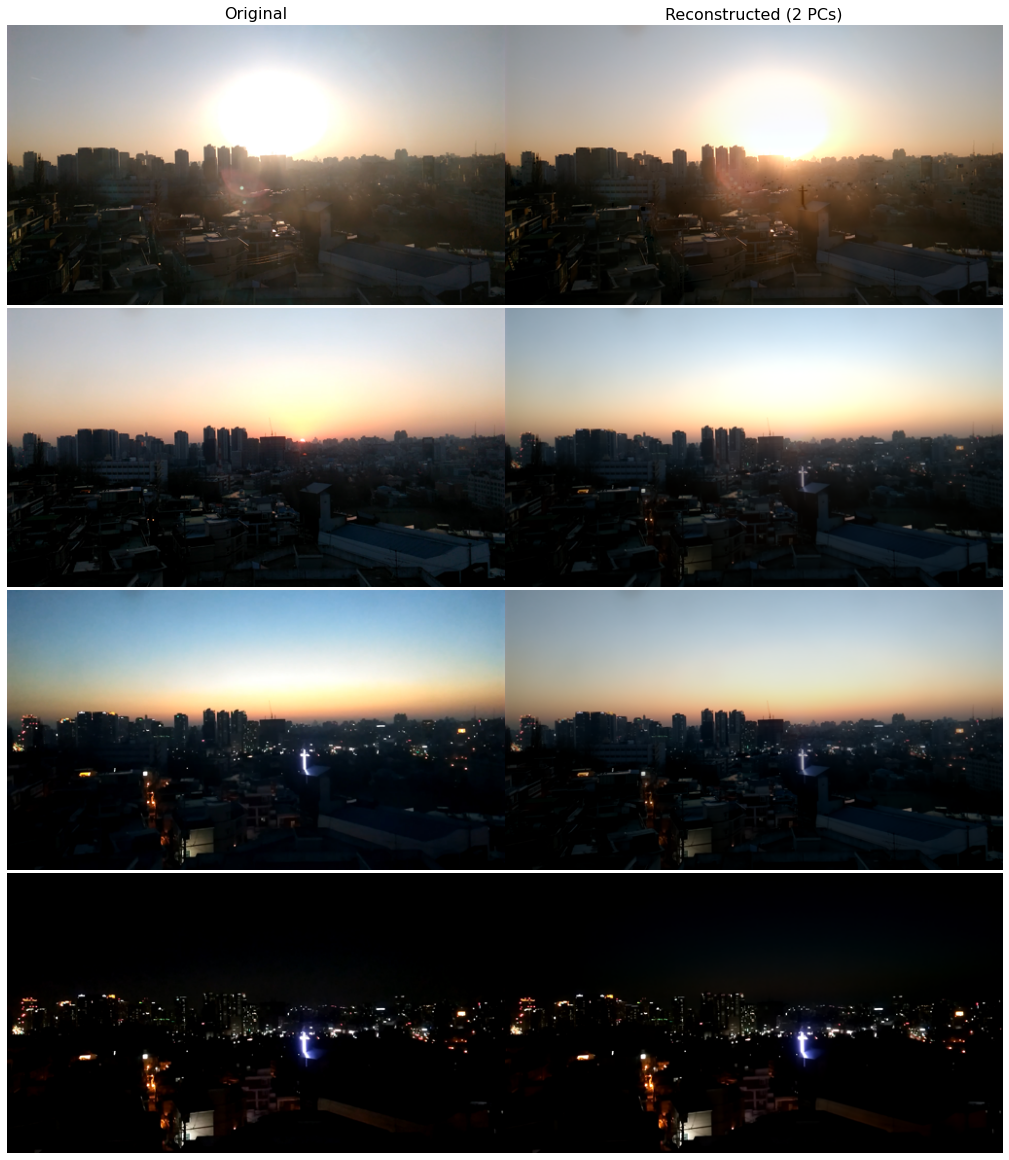

In [8]:
imgs_to_view = 4
scale = 4

fig, axes = plt.subplots(imgs_to_view, 2, figsize=(scale * 2 / target_im_size[1] * target_im_size[0], scale * imgs_to_view))

for i in range(imgs_to_view):
    img_idx = len(imgs) // imgs_to_view * i        

    axes[i, 0].imshow(get_img_from_data(imgs[img_idx]))
    axes[i, 0].axis('off')
    
    axes[i, 1].imshow(get_img_from_data(pca.inverse_transform([imgs_transformed[img_idx]])[0]))
    axes[i, 1].axis('off')

axes[0, 0].set_title("Original", fontsize=16)
axes[0, 1].set_title("Reconstructed (2 PCs)", fontsize=16)

fig.tight_layout(pad=0.3)
plt.show()

### Visualizing Images on a 2-D Plane

To pick a point far away from other components we can set its component values to maximum from both components, since neither of the pictures should have both high value on the 'night' component and a high value on the 'day' component.

In [9]:
new_point = np.array([pc1.max(), pc2.max()])

And now we can plot all of the images and the new point in a 2D graph of two principal components:

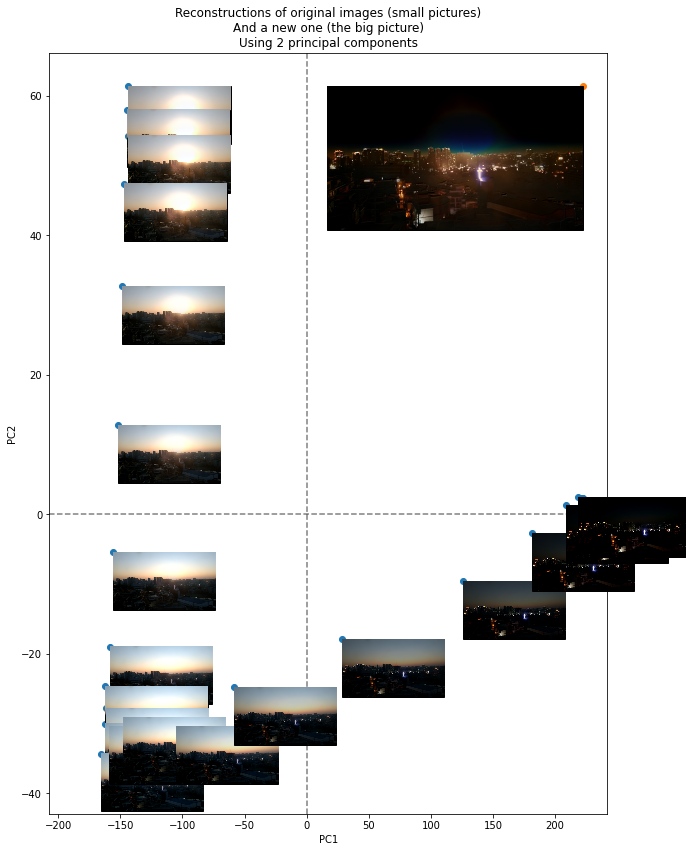

In [10]:
fig, ax = plt.subplots(figsize=(10, 14))

ax.scatter(pc1, pc2)
ax.scatter(new_point[0], new_point[1])

ax.axhline(0, ls='--', alpha=0.5, color='black')
ax.axvline(0, ls='--', alpha=0.5, color='black')

ax.set_xlim(pc1.min() * 1.25)
ax.set_ylim(pc2.min() * 1.25)

for i in range(len(imgs)):
    ax.add_artist(get_img_artist(
        pca.inverse_transform([imgs_transformed[i]])[0],  # reconstruct images from 2 components
        imgs_transformed[i], zoom=0.2, box_alignment=(0, 1)))

ax.add_artist(get_img_artist(pca.inverse_transform(new_point), new_point, zoom=0.5, box_alignment=(1, 1)))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Reconstructions of original images (small pictures)\n'
          'And a new one (the big picture)\n'
          'Using 2 principal components')
plt.show()

And we can take a closer look at the new point with the high values in both components:

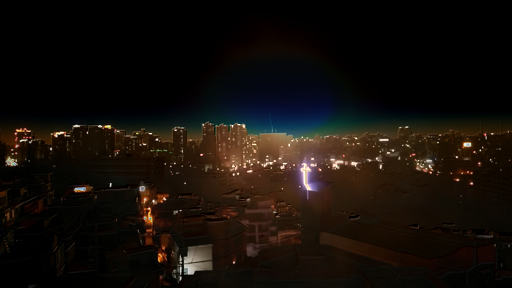

In [11]:
display(get_img_from_data(pca.inverse_transform(new_point)))

So, as we can see, it does combine the darkness of the surroundings from the first (night) component and the sun from the second (day) one.

### Out-of-bounds Images

Since we are not limited by the maximum values of the components, we can set the values on the components even higher:

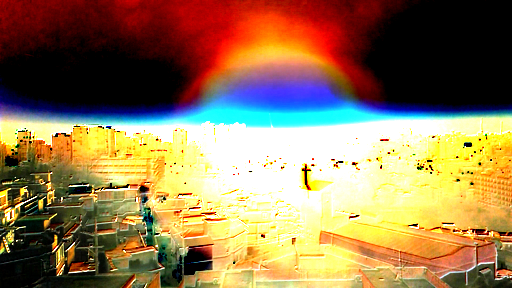

In [12]:
display(get_img_from_data(pca.inverse_transform([[100, 1000]])[0]))

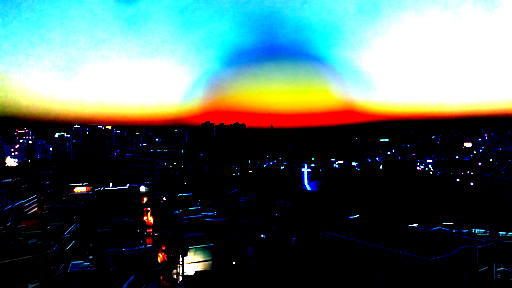

In [13]:
display(get_img_from_data(pca.inverse_transform([[-100, -1000]])[0]))

We can scatter even more images around the two components beyond their scales to get a better feel for what the components stand for: 

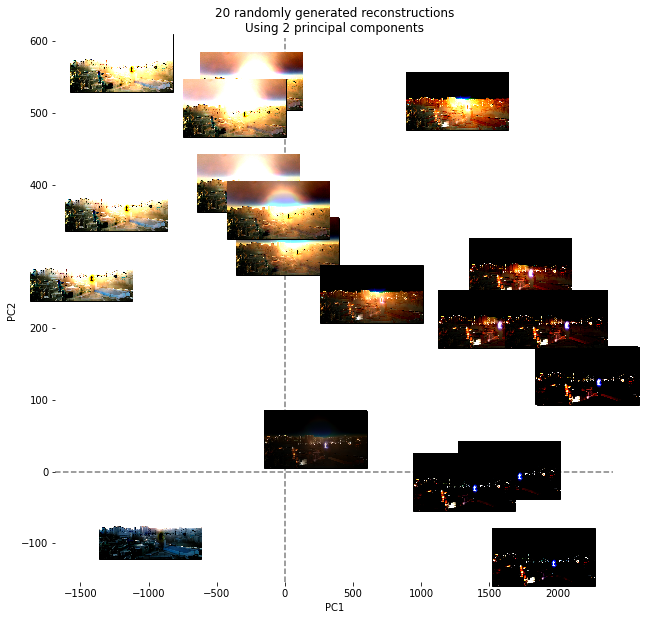

In [14]:
n_examples = 20
scale = 10
img_zoom = 0.2

pc1_min = scale * pc1.min()
pc1_max = scale * pc1.max()
pc2_min = scale * pc2.min()
pc2_max = scale * pc2.max()

new_imgs = np.array([
    np.random.randint(pc1_min, pc1_max, n_examples),
    np.random.randint(pc2_min, pc2_max, n_examples),
]).T

fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(new_imgs[:, 0], new_imgs[:, 1])
ax.axhline(0, ls='--', alpha=0.5, color='black')
ax.axvline(0, ls='--', alpha=0.5, color='black')

for i in range(n_examples):
    ax.add_artist(get_img_artist(
        pca.inverse_transform([new_imgs[i]])[0],  # reconstruct images from 2 components
        new_imgs[i], zoom=img_zoom))

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title(f'{n_examples} randomly generated reconstructions\n'
             'Using 2 principal components')
plt.box(on=None)
plt.show()

As we can see, PC1 indeed has to do with the darkness of the sky (and brightness of the cross) as can be seen by the fact that the more to the right an image is the darker its sky is. As for PC2, it has to do with the sun, which we can see by the fact that there is more radial glow in the center of the pictures the closer an image is to the top.

So, the PCA did manage to recognize the two most important characteristics of the image as well as use those characteristics to compress the images pretty well without losing much information, and generate new peculiar images not contained in the original set.

# Image Classification with **_Logistic Regression_** & **_Linear Discriminant Analysis_**

The data we will be working with are the [male](https://course-resources.minerva.kgi.edu/uploaded_files/mke/nA93zn/male-clothing.zip) and [female](https://course-resources.minerva.kgi.edu/uploaded_files/mke/VL14ar/female-clothing.zip) clothing images, which we will use to build a model to classify any given image of a piece of clothing as male or female.

## Preparing the data

In [1]:
from os import listdir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from PIL import Image
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import GridSearchCV

In [2]:
folder_men = "C:\\Users\\breedoon\\Downloads\\Man's Clothing - n03746330\\"
folder_women = "C:\\Users\\breedoon\\Downloads\\Woman's Clothing - n04596852\\"
target_im_size = (60, 80)  # smaller size for faster loading


def get_img_datas(folder, im_size=(256, 144)):
    """
    Reads all images found in `folder`, resizes them to fit into `target_im_size`,
    and convert to a normalized (0-1) list of rgb values of length `im_size[0] * im_size[1] * 3`
    i.e., [r00, r01, r02, ... g00, g01, ... b00, ...].
    Note: .png files will also have an vector of alpha values resulting in total length of `im_size[0] * im_size[1] * 4`
    """
    return np.array([
        (np.array(Image.open(folder + im_file)
                  .resize(im_size)
                  .getdata()) / 255  # convert to floats between 0 and 1
         ).flatten()  # append rgb values next to each other into one big 1-d array
        for im_file in listdir(folder)])


def get_img_from_data(im_data: np.array, im_size=target_im_size) -> Image:
    """
    Returns an image object from the given image data
    :param im_data: a 1d array of unstacked normalized rgb values (returned by `get_img_datas`)
    """
    im = Image.new('RGB', im_size)
    im.putdata(list(map(tuple,  # have to convert to tuples for some reason (otherwise gives an error)
                        (im_data.reshape((-1,  # reshape into 1 by 3 or 4 (rgb or rgba)
                                          len(im_data) // np.multiply(*im_size))) * 255).astype(int))))
    return im



def filled_confusion_matrix(y_true, y_pred, classes=(False, True), normalize=False, add_totals=False):
    """
    Returns a confusion matrix in a format:
           predicted
    actual  F    T
        F  TN   FP
        T  FN   TP: 
    """
    conf_m = confusion_matrix(y_true, y_pred)

    if normalize:
        conf_m = conf_m / conf_m.sum()

    filled_conf_m = pd.DataFrame(conf_m,
                                 index=pd.Series(classes, name='True'),
                                 columns=pd.Series(classes, name='Pred'))
    if add_totals:
        filled_conf_m = filled_conf_m.append(filled_conf_m.sum().rename('Total')).transpose()
        filled_conf_m = filled_conf_m.append(filled_conf_m.sum().rename('Total')).transpose()

    return filled_conf_m

In [3]:
x = np.concatenate([get_img_datas(folder_men, target_im_size),
                    get_img_datas(folder_women, target_im_size)])
y = np.zeros(len(x))
y[len(listdir(folder_men)):] = 1  # mark women as 1  (those indexed after all men images)


seed = 9921
x_train_full, x_test_full, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=seed)

## Classification using full dataset

Since we are equally interested in correctly classifying both kinds of clothes, and our dataset is pretty balanced (1242 versus 1270 images), it is okay for us to use a simple measure of accuracy to assess the performance of the models (while keeping in mind that the accuracy of a random classifier would be 0.5). 

In fact, in this case, accuracy is more preferable than other measures like precision, recall, or F-1 score, since they completely ignore the rate of true negatives (correctly classified male clothes in our case) which might give us a misleading information about the performance of our models. 

Alternatively, we could use (Matthews) correlation coefficient as the more reliable measure of the models' performance, but since our dataset is almost perfectly balanced, its value would be roughly equal to $r = 2a - 1$, where $a$ is the accuracy score, so it would not really tell us anything new, while being less intuitive to interpret than accuracy, so we might as well just stick with accuracy.

In [4]:
Classifier = LogisticRegression
grid_params = dict(
    C=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
    max_iter=[10000], # otherwise can fail to converge
)

# grid_search = GridSearchCV(Classifier(), param_grid=grid_params)
# grid_search.fit(x_train_full, y_train)
best_params = dict(C=0.001, max_iter=10000) # grid_search.best_params_

print('Best hyperparameters: ', best_params)

Best hyperparameters:  {'C': 0.001, 'max_iter': 10000}


In [5]:
model = Classifier(**best_params)
model.fit(x_train_full, y_train)

y_pred_train = model.predict(x_train_full)
y_pred = model.predict(x_test_full)
print('Train Accuracy:', accuracy_score(y_train, y_pred_train))
print('Test  Accuracy:', accuracy_score(y_test, y_pred))
print('\nTest Confusion Matrix:')
filled_confusion_matrix(y_test, y_pred, ['Men', 'Women'], True, True).applymap('{:,.1%}'.format)

Train Accuracy: 0.7222498755599801
Test  Accuracy: 0.6858846918489065

Test Confusion Matrix:


Pred     Men  Women   Total
True                       
Men    32.6%  18.3%   50.9%
Women  13.1%  36.0%   49.1%
Total  45.7%  54.3%  100.0%

As we can see, with full-resolution data, our model a bit better than random guessing on the testing data, having an accuracy of 0.68. The accuracy on the training data is not much better (0.72), which is mostly due to the cross-validation which managed to find the optimal value of the L2 regularization penalty (the C parameter) which made the model more generalizable (as compared to having higher train and lower test accuracy which would be the case with no regularization).

## Classification using PCA

To speed up the computation, we can compress the data using the Principal Component Analysis and use its lower-dimensional representation to build a classifier. The data is already scaled to 0-1 range, which should be sufficient for the PCA to treat all the features equally. 

We can start by initializing PCA with maximum number of components to see if it functions well:

In [6]:
pca = PCA()
pca.fit(x_train_full)

x_train = pca.transform(x_train_full)
x_test = pca.transform(x_test_full)

And we can visualize its first 30 components:

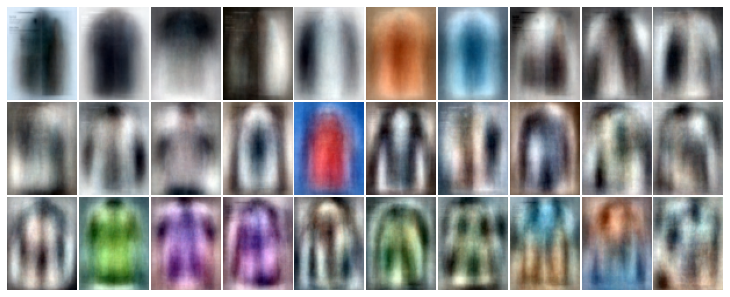

In [7]:
n_components = 30
imgs_per_row = 10
img_scale = 1

imgs = pca.components_[:n_components]
imgs_per_col = len(imgs) // imgs_per_row
figsize = (img_scale * imgs_per_row,
           img_scale * target_im_size[1] / target_im_size[0] * imgs_per_col)
fig, axes = plt.subplots(imgs_per_col, imgs_per_row, figsize=figsize)

for i in range(imgs_per_col):
    for j in range(imgs_per_row):
        axes[i, j].imshow(get_img_from_data(minmax_scale(imgs[i * imgs_per_row + j])))
        axes[i, j].axis('off')

fig.tight_layout(pad=0.2)
plt.show()

As we can see, the components (at least the first few) do seem to be more or less meaningful, differentiating the clothes by their shape, color, etc.

So, if we were to use a lower-dimensional representation of the dataset, we would need to decide on the number of principal components to keep, for which we can try building several models and PCAs with different number of components and measuring their performance:

In [8]:
components_ns = np.unique(np.geomspace(1, min(x_train_full.shape), num=10).astype(int))
y_preds_train = []
y_preds_test = []

for components_n in components_ns:
    pca = PCA(n_components=components_n).fit(x_train_full)

    x_train = pca.transform(x_train_full)
    x_test = pca.transform(x_test_full)

    model = Classifier(**best_params).fit(x_train, y_train)

    y_preds_train.append(model.predict(x_train))
    y_preds_test.append(model.predict(x_test))

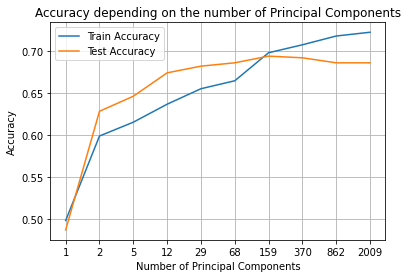

In [9]:
train_scores = np.asarray([accuracy_score(y_train, y_pred) for y_pred in y_preds_train]).T
test_scores = np.asarray([accuracy_score(y_test, y_pred) for y_pred in y_preds_test]).T

ns = list(map(str, components_ns))  # convert to str for equal spacing

plt.plot(ns, train_scores, label='Train Accuracy')
plt.plot(ns, test_scores, label='Test Accuracy')

plt.grid()
plt.legend()
plt.title('Accuracy depending on the number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.show()

As we can see, while the accuracy on the training data keeps increasing as we add more components, the test accuracy plateaus at ~0.68 after the first 159 of them, giving us pretty much the same performance as the model trained on the full dataset, but having only a small fraction of the number of its features.

## Classification using LDA

Similarly, we can use the label-aware LDA to compress our data down to a single feature (since we have only two classes), which, for simplicity, we can scale to a 0-1 range and use as LDA's classification confidence for which we would pick a threshold (which is what any linear classifier would do anyways): 

In [10]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train_full, y_train)

# Scale to 0-1 range
x_train_transformed = minmax_scale(lda.transform(x_train_full))
x_test_transformed = minmax_scale(lda.transform(x_test_full))

First we can look at the distribution of classes over the LDA component in test and train data:

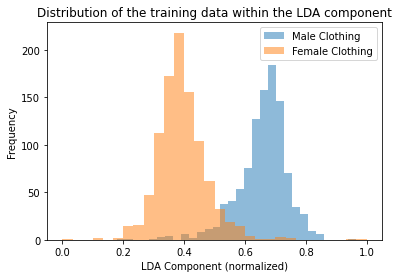

In [11]:
plt.hist(x_train_transformed[y_train.astype(bool)], alpha=0.5, label='Male Clothing', bins=30)
plt.hist(x_train_transformed[~y_train.astype(bool)], alpha=0.5, label='Female Clothing', bins=30)
plt.legend()
plt.xlabel('LDA Component (normalized)')
plt.ylabel('Frequency')
plt.title('Distribution of the training data within the LDA component')
plt.show()

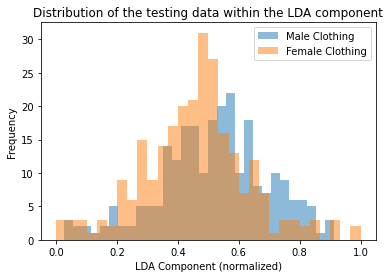

In [12]:
plt.hist(x_test_transformed[y_test.astype(bool)], alpha=0.5, label='Male Clothing', bins=30)
plt.hist(x_test_transformed[~y_test.astype(bool)], alpha=0.5, label='Female Clothing', bins=30)
plt.legend()
plt.xlabel('LDA Component (normalized)')
plt.ylabel('Frequency')
plt.title('Distribution of the testing data within the LDA component')
plt.show()

As we can see, the LDA does a pretty good job separating the two classes in the train data while not doing as good in the test dataset.

To quantify its performance, we can look at LDA's classification scores depending on the threshold on its component.

In [13]:
def get_threshold_scores(y_pred_proba, y_test, scorers=(accuracy_score, precision_score, recall_score, f1_score),
                         min_thr=0, max_thr=1, step=0.1):
    """
    Iterates through all possible thresholds and returns their respective accuracies within the model
    :return:  tuple of (thresholds, scores)
    """
    thresholds = np.arange(min_thr, max_thr + step, step)
    scores = []

    for scorer in scorers:
        scorer_scores = []
        for threshold in thresholds:
            y_pred = y_pred_proba >= threshold
            scorer_scores.append(scorer(y_test, y_pred))
        scores.append(scorer_scores)
    return thresholds, np.array(scores)


def plot_thresholds(y_pred_proba, y_test, scorers=(accuracy_score, precision_score, recall_score, f1_score), **kwargs):
    thresholds, scores = get_threshold_scores(y_pred_proba, y_test, scorers=scorers, **kwargs)
    for i in range(len(scorers)):
        plt.plot(thresholds, scores[i], label=scorers[i].__name__)

    plt.xticks(thresholds)
    plt.yticks(np.linspace(scores.min(), scores.max(), 11))
    plt.grid()

    plt.legend()

    plt.xlabel('Confidence threshold')
    plt.ylabel('Score')

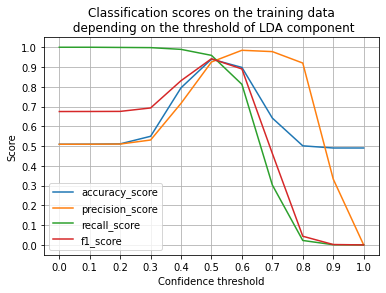

In [14]:
plot_thresholds(x_train_transformed, y_train)
plt.title('Classification scores on the training data\n depending on the threshold of LDA component')
plt.show()

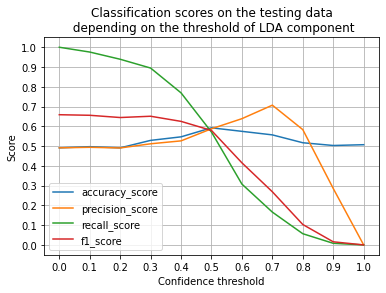

In [15]:
plot_thresholds(x_test_transformed, y_test)
plt.title('Classification scores on the testing data\n depending on the threshold of LDA component')
plt.show()

As expected, on the training data, LDA reaches nearly 95% accuracy at the threshold of 0.5, while on the testing data it barely achieves 60% (also at 0.5), which is hardly better than chance and simply means that LDA was overfit. Additionally, we cannot practically verify that the data (with all its 14400 features) was derived from two multivariate Gaussian distributions (which is the assumption of the LDA), meaning that LDA is not necessarily optimal or appropriate for this task.

## Summary

So, we first used the full-resolution data and were able to achieve the accuracy of 0.68 on the testing data using a cross-validated L2-penalized Logistic Regression. Then, we applied the Principal Component Analysis and achieved roughly the same accuracy with only 1% of the features. Then, we applied LDA and didn't even get 60% accuracy on the training data but did achieve almost 95% accuracy on the testing data.

Going forward, the best choice would be to, first, compress the initial dataset using at most 1000 components, and then apply another (preferably non-linear) classification model like the Support Vector Machines. A non-linear classifier might pick up on the relationships that the logistic regression did not, but with an uncompressed dataset it would take an eternity to cross-validate (given its cubic complexity), so PCA would help bring the cross-validation time down. After that, the model with the best hyperparameters can once again be trained on a full dataset to achieve the highest possible accuracy, or it might still use the compressed dataset without a significant reduction in performance.

Additionally, with enough computational power and patience, the images can also be loaded in their close-to-full resolution resulting in about $300 \cdot 400 \cdot 3 = 360,000$ features. This is unlikely to drastically improve the models' performance but might also result in a slight increase in accuracy.

# Moore's Law Verification with **_Linear Regression_**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, f1_score, confusion_matrix
from sklearn.datasets import load_digits
import statsmodels.api as sm

## Preparing the Data

In [2]:
cpu_benchmarks = pd.read_csv('benchmarks.csv', na_values='--')
cpu_benchmarks = pd.concat([cpu_benchmarks, pd.DataFrame(list(  # splitting 'cpu95-19990503-03574' into 3 columns
    cpu_benchmarks['testID'].str.split('-').values), columns=['cpu_year', 'date', 'id'])], axis=1)
# adjusting benchmark values
cpu_benchmarks.loc[cpu_benchmarks['cpu_year'] == 'cpu2006', ['base', 'peak']] *= 100
cpu_benchmarks.loc[cpu_benchmarks['cpu_year'] == 'cpu95', ['base', 'peak']] *= 10

# formatting dates as datetimes
dates = cpu_benchmarks['date'].copy()
dates[dates.str.len() < 8] = '19' + dates[dates.str.len() < 8]  # some dates in 1990s are marked just as '96', '98' etc
dates = pd.to_datetime(dates.str[:4] + '-' + dates.str[4:6] + '-' + dates.str[6:])  # '19990104' -> '1999-01-04', etc
cpu_benchmarks['date'] = dates

## Plotting

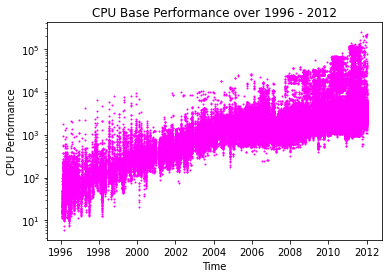

In [3]:
plot_data = cpu_benchmarks.copy()[['date', 'base', 'peak']].dropna()
x = plot_data['date'].copy()
y = plot_data['base'].copy()

plt.plot_date(x, y, c='magenta', markersize=1)

plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('CPU Performance')
plt.title('CPU Base Performance over 1996 - 2012')
plt.show()

## Linear Regression

### Preprocessing

In [4]:
x = x.astype('int64') / 1e9 / (60 * 60 * 24 * 365) # ns to s to years
y = np.log2(y)

### Model Summary

In [5]:
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   base   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.430e+07
Date:                Sun, 17 Jan 2021   Prob (F-statistic):                        0.00
Time:                        22:50:45   Log-Likelihood:                     -1.9027e+05
No. Observations:              130721   AIC:                                  3.805e+05
Df Residuals:                  130720   BIC:                                  3.806e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
date           0.2860   7.56e-05   3781.346      0.000       0.286       0.286
==============================================================================
Omnibus:                    28062.178   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90114.677
Skew:                           1.093   Prob(JB):                         0.00
Kurtosis:                       6.430   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
print('Increase over 1 year:\t', 2 ** model.params[0])
print('Increase over 2 years:\t', (2 ** model.params[0]) ** 2)

Increase over 1 year:	 1.2192755394497217
Increase over 2 years:	 1.4866328411004097


So, while it's not exactly the case that computing power doubles every two years, as Moore's law predicts, it is the case that the growth is exponential and it grows by roughly 50% every two years.

# Loan Amount Optimization with a **_Hybrid Model_**

Here, we will be trying to predict the most optimal loan amount to lend to a person using two approaches: classification and regression, as well as their combination, using the [Lending Club dataset](https://www.kaggle.com/wordsforthewise/lending-club).

## Data Acquisition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, minmax_scale, StandardScaler
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import Ridge, RidgeCV, LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score, r2_score, \
    mean_squared_error, explained_variance_score, classification_report, make_scorer
from sklearn.pipeline import Pipeline
from scipy.optimize import minimize

For the purposes of building a simple model (and because my computer is incapable of processing the entire dataset), we can take just a slice of the datasets to work with. To make sure that our slice is representative, we can sample the datapoints randomly using the parameter `skiprows` parameter in pandas' `read_csv()` which we can configure using the helper function below to skip a row with a given probability. For now, we can set that probability to 99% (i.e., we would preserver 1% of the data, or about 22,000 datapoints in the accept dataset).

In [2]:
file_acc = r"C:\Users\breedoon\Downloads\accepted_2007_to_2018Q4.csv"
file_rej = r"C:\Users\breedoon\Downloads\rejected_2007_to_2018Q4.csv"

np.random.seed(849)

def get_row_skipper(preserve=0.5):
    """
    Returns a callable that receives a row number and returns whether it should be skipped.

    :param preserve: a probability for any row (except row 0) to not be skipped
    :return: True if the row should be skipped or False otherwise
    """

    def skip_random_rows(row_idx):
        if row_idx == 0:
            return False  # do not skip the header
        return np.random.random() >= preserve

    return skip_random_rows


In [3]:
df_raw_acc = pd.read_csv(file_acc, skiprows=get_row_skipper(preserve=0.01))
df_raw_rej = pd.read_csv(file_rej, skiprows=get_row_skipper(preserve=0.01))

c:\users\breedoon\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0,19,118) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Modeling

### Classification of loan approval

We can start by building a classification model that, for any given applicant, would decide whether that applicant is eligible for a loan (i.e., whether we should classify him as accepted or rejected).

#### Preparing the data

In [4]:
shared_columns = ['loan_amnt', 'fico_range_low', 'dti', 'emp_length', 'addr_state']
rej_to_acc_cols = {
    'Amount Requested': 'loan_amnt',
    'Application Date': 'date',  # used only to convert vantage scores to fico
    'Risk_Score': 'fico_range_low',  # better to underestimates people's creditworthiness
    'Debt-To-Income Ratio': 'dti',
    'Employment Length': 'emp_length',
    'State': 'addr_state',
}

df_classif_rej = df_raw_rej.rename(rej_to_acc_cols, axis=1)
df_classif_acc = df_raw_acc[shared_columns].copy()

From the documentation of the reject dataset, we can see that the metric for 'Risk_Score' has changed on Nov 5th, 2013 from FICO to Vantage score, which are not exactly equivalent. So, for consistency, given the fact that accept database contains only FICO scores, we should convert all of the scores to FICO using a simplified [formula](https://www.credit-report-101.com/credit-report-archive/convert-vantage-fico/): FICO = (Vantagescore – 501) * 1.12 + 300.

In [5]:
# convert from vantage to fico for consistency based on the formula from:
# https://www.credit-report-101.com/credit-report-archive/convert-vantage-fico/

date_of_switch_from_fico_to_vantage = dt(2013, 11, 5)

rows_with_vantage_mask = pd.to_datetime(df_classif_rej['date']) >= date_of_switch_from_fico_to_vantage
df_classif_rej.loc[rows_with_vantage_mask, 'fico_range_low'] = (df_classif_rej[rows_with_vantage_mask]['fico_range_low']
                                                                - 501) * 1.12 + 300

df_classif_rej.drop('date', axis=1, inplace=True)

Then, we need to convert the reject DTI values into the same number format as the accept dataset (e.g., '55%' -> '55'):

In [6]:
df_classif_rej.loc[:, 'dti'] = df_classif_rej['dti'].str.replace('%', '').astype('float64')

Now we can combine the two datasets into one, and finish the remaining steps of preparing the data for the combined dataset.

Also, since our goal is to ensure the person in question is actually eligible for the loan, we should mark as rejected those people who were initially accepted but ended up not being able to pay off the loan.

In [7]:
# adding the label
df_classif_acc['accepted'] = True
df_classif_rej['accepted'] = False

# unmark those who were accepted but defaulted as rejected
df_classif_acc.loc[df_raw_acc['loan_status'] == 'Default', 'accepted'] = False

shared_columns.append('accepted')
df_classif_combined = pd.concat([df_classif_acc[shared_columns], df_classif_rej[shared_columns]], ignore_index=True)


And finally, we need to convert the employment length into a numeric variable:

In [8]:
def emp_length_to_number(emp_length: pd.Series):
    """
    Converts employment length of format 'n years' column to numbers.
    >>> emp_length_to_number(pd.Series(['< 1 year', '1 year', '5 years', '10 years', '10+ years']))
    pd.Series([0.0, 1.0, 5.0, 10.0, 11.0], dtype='float64')
    """
    return (emp_length  # bring all to the same format of 'n years'
            .replace('< 1 year', '0 years').replace('1 year', '1 years').replace('10+ years', '11 years')
            .str[:-6]  # remove the 'years' part
            .astype('float64'))  # convert to float to preserve nans


In [9]:
df_classif_combined.loc[:, 'emp_length'] = emp_length_to_number(df_classif_combined['emp_length'])

In [10]:
df_classif_combined.dropna(inplace=True)

In [11]:
columns_classif = ['loan_amnt', 'fico_range_low', 'dti', 'emp_length']

x = df_classif_combined[columns_classif]
y = df_classif_combined['accepted']

seed = 56061
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=seed)

#### Model Selection

##### Choosing the model type and its parameters

To choose the right model and make sure it does not overfit, we can run a standard 5-fold cross-validation on 3 popular classification models: KNN, Random Forest, and Logistic Regression, and choose the one that obtains the highest score across all 5 folds.

There are multiple metrics that would help us score the candidate models, and to choose one we need to consider the context of the application of our model. In our case, representing the loan sponsor, we would be far more sensitive to false positives than to false negatives (i.e., we would rather underfund somebody than give somebody a loan they won't pay back), which means that the more appropriate metric for us to use would be precision.

In [12]:
classifiers = [
    KNeighborsClassifier, RandomForestClassifier, LogisticRegression
]

param_grids = [
    dict(n_neighbors=[1, 5, 10, 50]),
    dict(n_estimators=[10, 50, 100, 300],
         max_depth=[3, 10, None],
         max_features=['auto', 'sqrt']),
    dict(C=[0.01, 0.1, 1, 10, 100])
]

In [13]:
best_params = []
best_scores = []

for i in range(len(classifiers)):
    print(f'Training {classifiers[i].__name__}...')
    model = classifiers[i]()

    grid_search = GridSearchCV(model, n_jobs=-1, param_grid=param_grids[i], verbose=5,
                               scoring=make_scorer(precision_score))
    grid_search.fit(x_train, y_train)

    best_params.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

    print(classifiers[i].__name__)
    print('Best params:', grid_search.best_params_)
    print('Best score:', grid_search.best_score_, end='\n\n')

Training KNeighborsClassifier...
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    9.5s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    9.8s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   12.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   12.2s finished


KNeighborsClassifier
Best params: {'n_neighbors': 1}
Best score: 0.8665328683049708

Training RandomForestClassifier...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.6min finished


RandomForestClassifier
Best params: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 10}
Best score: 0.9280195213948943

Training LogisticRegression...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:    5.0s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    6.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.8s finished


LogisticRegression
Best params: {'C': 0.1}
Best score: 0.8398147906364054



c:\users\breedoon\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
best_idx = max(range(len(classifiers)), key=lambda i: best_scores[i])
model_classif = classifiers[best_idx](**best_params[best_idx]).fit(x_train, y_train)
y_pred = model_classif.predict(x_test)

print(f'Best classifier: {classifiers[best_idx].__name__}')
print('Precision:', f"{precision_score(y_test, y_pred)}", end='\n\n')


Best classifier: RandomForestClassifier
Precision: 0.9298054191671213



##### Picking a confidence threshold

After having picked the best model parameters that give us the highest precision at the standard confidence threshold of 0.5, we might try to manipulate this threshold to see if we can get better values and whether it would be worth it.

In [15]:
def filled_confusion_matrix(y_true, y_pred, classes=(False, True), normalize=False):
    conf_m = confusion_matrix(y_true, y_pred)
    if normalize:
        conf_m = conf_m / conf_m.sum()
    return pd.DataFrame(conf_m,
                        index=pd.Series(classes, name='True'),
                        columns=pd.Series(classes, name='Pred'))


def get_proba_predictions(model, x, threshold=0.5):
    """
    Returns predictions of the given sklearn model based on the threshold of the prediction probability
    """
    return model.predict_proba(x).transpose()[1] >= threshold


def get_threshold_scores(model, x_test, y_test, scorers=(precision_score, recall_score, f1_score, accuracy_score),
                         min_thr=0.1, max_thr=0.5, step=0.1):
    """
    Iterates through all possible thresholds and returns their respective accuracies within the model
    :return:  tuple of (thresholds, scores)
    """
    thresholds = np.arange(min_thr, max_thr + step, step)
    scores = []

    y_pred_proba = model.predict_proba(x_test).transpose()[1]

    for scorer in scorers:
        scorer_scores = []
        for threshold in thresholds:
            y_pred = y_pred_proba >= threshold
            scorer_scores.append(scorer(y_test, y_pred))
        scores.append(scorer_scores)
    return thresholds, np.array(scores)


def find_best_thresholds(model, x_test, y_test, **kwargs):
    thresholds, scores = get_threshold_scores(model, x_test, y_test, **kwargs)
    max_inds = scores.argmax(axis=1)
    return thresholds[max_inds], scores.max(axis=1)


def plot_thresholds(model, x_test, y_test, scorers=(precision_score, recall_score, f1_score, accuracy_score), **kwargs):
    thresholds, scores = get_threshold_scores(model, x_test, y_test, scorers=scorers, **kwargs)
    for i in range(len(scorers)):
        plt.plot(thresholds, scores[i], label=scorers[i].__name__)
    plt.title('Score depending on the threshold of ' + type(model).__name__)
    plt.legend()
    plt.grid()

    plt.xlabel('Confidence threshold')
    plt.ylabel('Score')

    plt.show()


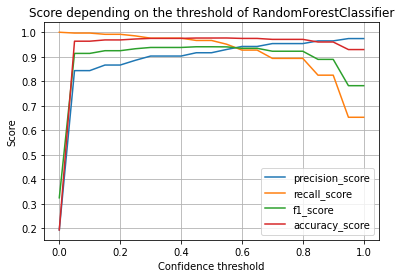

In [16]:
plot_thresholds(model_classif, x_test, y_test, min_thr=0, max_thr=1, step=0.05)

As we can see from the graph, precision tends upward as the threshold increases reaching almost 100%. However, we can also see that recall follows a downward trend (as expected) and sees the greatest falls between the thresholds of about 0.9 and 0.95 where it drops from over 0.8 to about 0.65 while precision only barely increases. A smaller drop occurs around the threshold of 0.8, and an even smaller one around 0.6. So, we can take a closer look at the confusion matrices at those thresholds to make a final decision about them. 

First, for comparison, we can look at the default confusion matrix with a threshold of 0.5:

In [17]:
threshold = 0.5
y_pred = get_proba_predictions(model_classif, x_test, threshold)
filled_confusion_matrix(y_test, y_pred, ['Rej', 'Acc'], normalize=True)

Pred       Rej       Acc
True                    
Rej   0.788892  0.017105
Acc   0.006496  0.187507

In [18]:
threshold = 0.6
y_pred = get_proba_predictions(model_classif, x_test, threshold)
filled_confusion_matrix(y_test, y_pred, ['Rej', 'Acc'], normalize=True)

Pred       Rej       Acc
True                    
Rej   0.792068  0.013929
Acc   0.009491  0.184512

In [19]:
threshold = 0.8
y_pred = get_proba_predictions(model_classif, x_test, threshold)
filled_confusion_matrix(y_test, y_pred, ['Rej', 'Acc'], normalize=True)

Pred       Rej       Acc
True                    
Rej   0.797589  0.008408
Acc   0.020678  0.173325

In [20]:
threshold = 0.9
y_pred = get_proba_predictions(model_classif, x_test, threshold)
filled_confusion_matrix(y_test, y_pred, ['Rej', 'Acc'], normalize=True)

Pred       Rej       Acc
True                    
Rej   0.800152  0.005846
Acc   0.033958  0.160045

In [21]:
threshold = 0.95
y_pred = get_proba_predictions(model_classif, x_test, threshold)
filled_confusion_matrix(y_test, y_pred, ['Rej', 'Acc'], normalize=True)

Pred       Rej       Acc
True                    
Rej   0.802642  0.003356
Acc   0.067266  0.126737

As we can see, with the default threshold of 0.5, our model advises us to fund an uncreditworthy person 1.7% of the time while it tells us to reject a person who could've been funded 0.6% of the time, leaving us with 18% of people who were correctly classified as creditworthy and whom we would fund. On the other end of the spectrum, a threshold of 0.95 significantly reduces the  chances of funding uncreditworthy people to 0.3% but leaves us with just 12% of those to fund with the remaining 6% being mistakenly marked as uncreditworhy. The remaining thresholds provide us with several intermediate values which in practice would be chosen based on risk aversion of the sponsor, but for our purposes we can pick a threshold of 0.8, which halves the number of false positives to 0.8% while keeping the number of true positives at a relatively high 17%.

## Regression model of loan amount

Now, after we potentially filtered out the ineligible applicants, we can focus on determining the optimal value of the loan that an applicant should receive. Given we're working with alread accepted applicants

### Preparing the data

In [22]:
known_columns = ['addr_state', 'annual_inc', 'annual_inc_joint', 'application_type', 'dti', 'dti_joint', 'emp_length',
                 'fico_range_high', 'fico_range_low', 'home_ownership', 'loan_amnt', 'purpose']
df_regr = df_raw_acc[known_columns].copy()

As we can see, some of the columns are related to joint loan applications, which, ideally, would require building a separate model, but in this case, we might want to check if these applications comprise a significant portion of the application pool for us to care about it, and if they don't, we might just get rid of them for the sake of simplicity.

In [23]:
df_regr.groupby('application_type')['application_type'].count() / len(df_regr)

application_type
Individual    0.945637
Joint App     0.054319
Name: application_type, dtype: float64

As we can see, about 95% of all applications are non-joint so we won't lose much by getting rid of them entirely.

In [24]:
df_regr.drop(['annual_inc_joint', 'application_type', 'dti_joint'], axis=1, inplace=True)

Then, we, similarly, we need to convert the employment length into a number:

In [25]:
df_regr.loc[:, 'emp_length'] = emp_length_to_number(df_regr['emp_length'])
df_regr.dropna(inplace=True)

Now, we have a few categorical variables which we would need to convert to dummy variables in order to use in a regression model:

In [26]:
categorical_cols = ['addr_state', 'home_ownership', 'purpose']
dummies = pd.get_dummies(df_regr[categorical_cols])
df_regr.loc[:, dummies.columns] = dummies

In [27]:
columns_regr = ['annual_inc', 'dti', 'emp_length', 'fico_range_low']
y_col = 'loan_amnt'
x_cols = columns_regr + dummies.columns.tolist()

y = df_regr[y_col]
x = df_regr[x_cols]

seed = 38429
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=seed)

To normalize our data to be easily applied in regression models, we should preprocess it to having the same means and variances:

In [28]:
x_scaler = StandardScaler().fit(x_train)
x_train = x_scaler.transform(x_train)

### Model selection

We can try a few models to perform this regression task, a Ridge Linear Regression, and a Random Forest.

In [29]:
def get_y_pred_preprocessed(model, x_test, x_scaler=x_scaler):
    return model.predict(x_scaler.transform(x_test))

In [30]:
model = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100])
model.fit(x_train, y_train)

y_pred = get_y_pred_preprocessed(model, x_test, x_scaler)
explained_variance_score(y_test, y_pred)

0.012050022536270966

In [31]:
model = RandomForestRegressor()

grid_search = GridSearchCV(model, n_jobs=-1, param_grid=param_grids[1])
grid_search.fit(x_train, y_train)

print('Best params:', grid_search.best_params_)
print('Best score:', grid_search.best_score_, end='\n\n')

Best params: {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 300}
Best score: 0.2835250978305646



In [32]:
model_regr = RandomForestRegressor(**grid_search.best_params_)

model_regr.fit(x_train, y_train)

y_pred = get_y_pred_preprocessed(model_regr, x_test, x_scaler)
explained_variance_score(y_test, y_pred)

0.2964294106759592

### Model evaluation

Since our model is a random forest, we can take a look at which features turned out to be the most important at determining the loan amount:

In [33]:
pd.DataFrame([x.columns, model_regr.feature_importances_],
             index=['Feature', 'Gini importance']
             ).transpose().sort_values('Gini importance', ascending=False)

Feature Gini importance
0                   annual_inc        0.551323
1                          dti        0.141947
3               fico_range_low        0.071503
61  purpose_debt_consolidation       0.0277434
2                   emp_length       0.0276849
..                         ...             ...
69    purpose_renewable_energy     5.21108e-05
72             purpose_wedding     3.80022e-05
62         purpose_educational     4.08229e-07
56        home_ownership_OTHER     3.84706e-09
54          home_ownership_ANY               0

[73 rows x 2 columns]

We can also look at the residuals of our model, and how they depend on the true loan amount

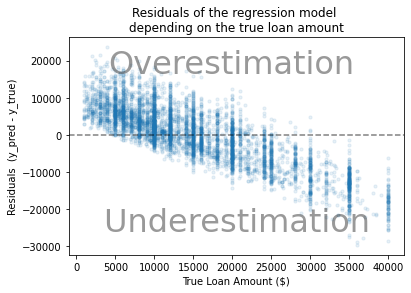

In [299]:
residuals = y_pred - y_test

plt.scatter(y_test, residuals, s=10, alpha=0.1, label='True')
plt.xlabel('True Loan Amount ($)')
plt.ylabel('Residuals  (y_pred - y_true)')
plt.title('Residuals of the regression model \ndepending on the true loan amount')

plt.axhline(0, ls='--', c='k', alpha=0.5)
plt.annotate('Overestimation', xy=(y_pred.max() / 1.75, residuals.max() / 1.25), size=32, color='k', alpha=0.4,
                ha='center', va='center')
plt.annotate(' Underestimation', xy=(y_pred.max() / 1.75, residuals.min() + residuals.max() / 4), size=32, color='k', alpha=0.4,
                ha='center', va='center')
plt.show()

## Combining the Models

As we can see, our regression model can be off by over $10,000 which can be decisive in accepting or rejecting somebody's loan application, while our classification model is pretty precise in determining whether an application with a given loan amount would be accepted. Given that, we can leverage the high performance of our classification model to correct the predictions made by the regression model, i.e., if a person with a predicted loan amount was classified as accepted we would bump up that amount to find a value beyond which he is no longer accepted (to correct for regression model's underestimation), or if that person was classified as rejected with that amount, we can bump it down
until (or if) that person is accepted (to correct for overestimation).

Ideally, we wouldn't even need to have a regression model and instead we could just start from $0 and keep increasing the loan amount for each application until we hit the ceiling and use that value as our prediction. However, our classification model might mistakenly always give acceptance to some people no matter the loan amount simply because it was not trained on anyone requesting a million-dollar loan (which is particularly true of random forests, compared to, for example, logistic regression which would have coefficients generalizable beyond the training data). So, in a case where our model does give acceptance to a person no matter how insanely high the requested loan amount is, we would indeed have to use on the initial prediction of our regression model to return as our final prediction. 

Relying on the less accurate regression model does seem to involve more risk of lending a person more money than they can pay back, but, as we can see from the residuals graph, the regression model tends to underestimate for higher loan amounts which should potentially decrease the total monetary loss resulting from this inaccuracy. As for the lower loan amounts where the model tend to overestimate, this risk is only relevant if our classification model mistakenly classified the ineligible applicant as eligible, which happens only 5% of the time (with the threshold of 0.8). In most other cases, if the regression model overestimated, the classification model would spot that and we would bring down the loan amount to the level approved by the classification model.

### Final Product

Now, we can combine our two models under a single function, as well as add the functions that would perform the optimization procedure of the loan amount as discussed above:

In [384]:
IMPOSSIBLE_LOAN_AMT = 1e9  # used to verify that the model won't always give acceptance
MAX_LOAN_AMT = 100_000_000  # maximum laon amount (will not increase beyond that even if a person is classified as accepted)


def optimize_loan_amt_single(loaner, threshold=0.5):
    """
    Uses scipy optimization to find the highest possible loan amount for the given applicant to be approved.
    :param loaner: a list (or Series) of 4 (preprocessed) application values: loan_amnt, fico_range_low, dti, emp_length
    :param threshold: a confidence threshold for the classification model of loan approval
    :return: loaner data with updated loan_amnt
    """
    loaner_no_amnt = loaner.drop('loan_amnt').copy()

    # Objective function that returns either the given loan amt if approved or 0 otherwise
    obj_function = lambda loan_amnt: -loan_amnt * get_proba_predictions(
        model_classif, [loaner_no_amnt.append(pd.Series(dict(loan_amnt=loan_amnt)))[columns_classif]], threshold)

    loaner['loan_amnt'] = minimize(obj_function, [loaner['loan_amnt']],
                                   method='TNC', bounds=[(0, MAX_LOAN_AMT)]).x[0]

    return loaner


def optimize_loan_amts(loaners: pd.DataFrame, threshold=0.5):
    loaners_copy = loaners.copy()
    
    # Get acceptance with initial loan amounts
    loaners_copy.dropna(subset=columns_classif, inplace=True)
    initial_accepted = get_proba_predictions(model_classif, loaners_copy[columns_classif], threshold)

    # To check if model has an upper boundary and won't give acceptance no matter what  (all should be False)
    loaners_copy['loan_amnt'] = IMPOSSIBLE_LOAN_AMT
    new_accepted_high = get_proba_predictions(model_classif, loaners_copy[columns_classif], threshold)
    
    # To check if people who weren't accepted with non-zero amounts would be accepted with for loan of 0
    new_accepted_low = get_proba_predictions(model_classif, loaners[columns_classif], threshold)
    
    # Was True but became False with a large loan amount (i.e., we can push the current amount up) 
    # or was Fasle but becamse True with $0 (i.e., we can lower the amount to gain acceptance)
    mask_optimizable = (initial_accepted > new_accepted_high) | (initial_accepted < new_accepted_low & ~new_accepted_high)
    loaners.loc[mask_optimizable] = loaners[mask_optimizable].apply(
        lambda loaner: optimize_loan_amt_single(loaner, threshold), axis=1)
    return loaners


def find_max_loan_amt(loaners: pd.DataFrame, threshold=0.5, reject_as_0=True, maximize=False):
    """
    :param loaners: dataframe in format of the accept dataset;
    must contain the following columns:
    annual_incm, dti, emp_length, fico_range_low, addr_state, home_ownership, purpose
    :param threshold: a confidence threshold to be given to the classification model
    to make a decision on whether any given person should be funded.
    :param reject_as_0: wheather set the loan amount to 0 for those who are classified as rejected.
    :param maximize: whether an optimization technique should be applied to find the highers possible loan amount
     for each eligible applicant (takes time).

    :returns: a dataframe with the feature columns (above) plus a loan_amnt column
    containing either 0 (if loan was not approved) or the value of the loan in dollars.
    """
    x_test = loaners.copy()

    new_dummies = pd.get_dummies(x_test[categorical_cols])

    # Drop dummy values that didn't exist in training set
    new_dummies.drop(set(new_dummies.columns) - set(dummies.columns), axis=1, inplace=True)

    # Set dummy values that exist in training set but not in `loaners` to 0`
    new_dummies[list(set(dummies.columns) - set(new_dummies.columns))] = 0

    x_test[new_dummies.columns] = new_dummies

    x_test['emp_length'] = emp_length_to_number(x_test['emp_length'])

    x_test.dropna(subset=x_cols, inplace=True)

    x_test['loan_amnt'] = get_y_pred_preprocessed(model_regr, x_test[x_cols])

    if reject_as_0:
        x_test.dropna(subset=columns_classif, inplace=True)
        accept = get_proba_predictions(model_classif, x_test[columns_classif], threshold)

        # Set loan amount of those who should not be accepted to 0
        x_test.loc[~accept, 'loan_amnt'] = 0

    if maximize:
        x_test = optimize_loan_amts(x_test, threshold)

    return x_test[columns_regr + categorical_cols + ['loan_amnt']]


We can test this approach by taking another 1% sample from our accepted dataset. The sampling is technically with replacement, so there can be some datapoints that the model has already seen, but given that both of the sets comprise about 1% of the full datasets, the number of such datapoints should be insignificant. In any case, we would look at this subset only for the purposes of demonstration

In [385]:
loaners_test = pd.read_csv(file_acc, skiprows=get_row_skipper(preserve=0.01))

c:\users\breedoon\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0,19,118) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [400]:
loaners_res = find_max_loan_amt(loaners_test, threshold=0.8)

loaners_res.head()

annual_inc    dti  emp_length  fico_range_low addr_state home_ownership  \
0     55000.0   5.91        11.0           675.0         PA       MORTGAGE   
1     97000.0  22.22        11.0           710.0         NY            OWN   
2     38000.0  25.36         3.0           660.0         KS           RENT   
3    120000.0  18.32        11.0           705.0         MI       MORTGAGE   
4    134000.0  26.05         0.0           680.0         MI           RENT   

              purpose     loan_amnt  
0  debt_consolidation  10718.401611  
1      major_purchase  15584.004647  
2  debt_consolidation  10814.264527  
3  debt_consolidation  22405.470009  
4  debt_consolidation  23693.710970

To simplify calculations for a single person to get a better grasp at knowing what our model is doing, we can create a wrapper function that would output the targeted loan amount for a given person:

In [387]:
def get_single_loan_prediction(annual_inc, fico, dti, emp_length, addr_state, home_ownership, purpose,
                               threshold=0.8, reject_as_0=True, maximize=True):
    """
    Finds the optimal amount of money to be loaned to the applicant given the information provided in their application.

    :param annual_inc: Annual income in dollars of the applicant
    :param fico: FICO score of the applicant
    :param dti: Debt to income ration (in %) of the applicant
    :param emp_length: number of years employed, one of '< 1 year', '1 year', '2 years', ... '10 years', '10+ years'
    :param addr_state: home state address of the applicant
    :param home_ownership: one of 'MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE'
    :param purpose: one of  'debt_consolidation', 'credit_card', 'home_improvement', 'other',
                            'car', 'major_purchase', 'medical', 'small_business', 'moving',
                            'vacation', 'house', 'renewable_energy', 'wedding', 'educational'
    :param threshold: a confidence threshold of whether the applicant is creditworthy.
    The higher the value, the more likely the applicant is to get rejected.
    :returns: amount of money in dollars to be given to the applicant (or 0 if their application should be rejected)
    """
    return find_max_loan_amt(pd.DataFrame(dict(
        annual_inc=annual_inc,
        fico_range_low=fico,
        dti=float(dti.replace('%', '')),  # remove the %
        emp_length=emp_length,
        addr_state=addr_state,
        home_ownership=home_ownership,
        purpose=purpose,
    ), index=[0]), threshold=threshold, reject_as_0=reject_as_0, maximize=maximize).loc[0, 'loan_amnt']

### Usage Example

Let's see how our algorithms works on a random person from Washington with an income of $60,000, a high FICO score, low DTI, renting a home, and asking for a loan for his small business:

In [388]:
person = dict(
    annual_inc=60000,
    fico=770,
    dti='2%',
    emp_length='3 years',
    addr_state='WA',
    home_ownership='RENT',
    purpose='small_business'
)
get_single_loan_prediction(**person, maximize=False)

13525.644821904627

How would the loan amount change if that person was in California?

In [389]:
get_single_loan_prediction(**{**person, 'addr_state': 'CA'}, maximize=False)

14151.674207566513

What would the loan be if his income was $90,000?

In [390]:
get_single_loan_prediction(**{**person, 'annual_inc': 90000}, maximize=False)

23974.33030917688

What is the maximum possible amount of money we can borrow to that person?

In [391]:
get_single_loan_prediction(**person, maximize=True)

28900.000943407416

Now, what would happed to the loan amount if the DTI was much higher and fico was much lower, but also income was much higher and employment length was much higher?

In [392]:
person = {**person, 
                  'dti': '20%', 
                  'fico': 705, 
                  'annual_inc': 125000, 
                  'emp_length': '10+ years'}
get_single_loan_prediction(**person, maximize=False)

0.0

We can also look at what loan amount our regression model assigned to that person for which he wasn't approved:

In [393]:
get_single_loan_prediction(**person, reject_as_0=False, maximize=False)

22137.707090962063

And we can also try to find a lower amount for which he would be approved:

In [394]:
get_single_loan_prediction(**person, maximize=True)

19875.000862143934

### Conclusion

Both models have their advantages and disadvantages: the classification model is very accurate (Precision = 0.95) but can approve a person with unreasonably high loan amount, while the regression model is not very accurate ($R^2 = 0.28$) but gives does give a reasonable single number, and the combination of these models managed to combine the benefits of both of them while minimizing their downsides.

# CO$_2$ Concentration Forecasting with **_Gaussian Processes_**

In [1]:
import GPy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import explained_variance_score
from time import sleep

In [4]:
co2_data_file = 'co2_mm_mlo.csv'

co2_data = pd.read_csv(co2_data_file, sep=r'\s+')

In [5]:
# leave only data 1975 - 2020
co2_data_train = co2_data[co2_data.year < 2015].copy()
co2_data_test = co2_data[co2_data.year >= 2015].copy()

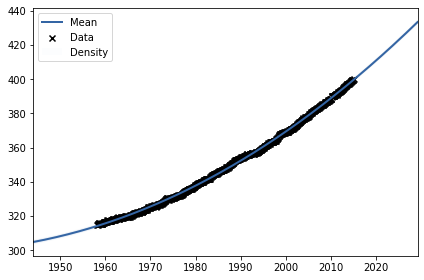

In [6]:
x_year = co2_data_train.decimal_date.values.reshape(-1, 1)
y_year = co2_data_train.deseasonalized.values.reshape(-1, 1)

model_year = GPy.models.GPRegression(x_year, y_year, GPy.kern.PolynomialBasisFuncKernel(input_dim=1, degree=3))
model_year.optimize()

model_year.plot(plot_density=True)
plt.show()

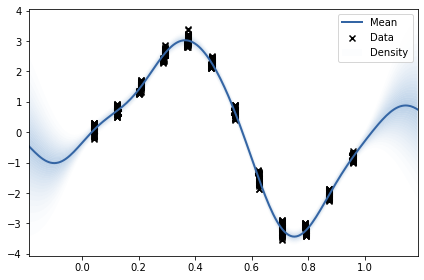

In [7]:
x_month = co2_data_train.decimal_date.values.reshape(-1, 1) % 1
y_month = (co2_data_train.monthly_average - co2_data_train.deseasonalized).values.reshape(-1, 1)

model_month = GPy.models.GPRegression(x_month, y_month, GPy.kern.PeriodicExponential(input_dim=1))
model_month.optimize()

model_month.plot(plot_density=True)
plt.show()


In [8]:
def predict(decimal_date):
    y_year_pred, y_year_pred_var = model_year.predict(decimal_date.values.reshape(-1, 1))
    y_month_pred, y_month_pred_var = model_month.predict((decimal_date % 1).values.reshape(-1, 1))

    y_pred = (y_year_pred + y_month_pred)[:, 0]
    y_pred_var = (y_year_pred_var + y_month_pred_var)[:, 0]
    y_pred_std = np.sqrt(y_pred_var)

    return y_pred, y_pred_std


def plot_prediction(co2_data):
    y_pred, y_pred_std = predict(co2_data.decimal_date)

    plt.plot(co2_data.decimal_date, y_pred, color='magenta', label='Predicted')
    plt.fill_between(co2_data.decimal_date, y_pred - y_pred_std * 1.96, y_pred + y_pred_std * 1.96,
                     color='pink', alpha=0.5, label='95% Confidence Interval')
    plt.plot(co2_data.decimal_date, co2_data.monthly_average, color='darkred', label='Actual Values')

    plt.grid(axis='x')
    plt.legend()
    plt.title('Predicted and actual CO2 concentration\n'
              f'for years {co2_data.year.min()}-{co2_data.year.max()}')
    plt.ylabel('Monthly average CO2 concentration (ppm)')
    plt.xlabel('Date')
    plt.show()


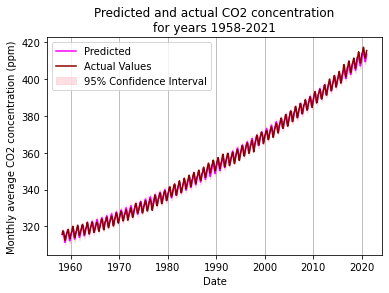

In [9]:
plot_prediction(co2_data)

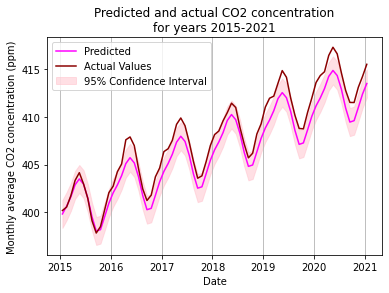

In [10]:
plot_prediction(co2_data_test)

In [11]:
print('Test Data R² =', explained_variance_score(co2_data_test.monthly_average, predict(co2_data_test.decimal_date)[0]))

Test Data R² = 0.9795020772346872


# Temperature Modeling with **_Parametric Linear Regression_**

## Preparing the Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import pandas as pd
from datetime import datetime as dt, timedelta as td
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.model_selection import GridSearchCV

In [2]:
file_template = 'yosemite_village/CRNS0101-05-{year}-CA_Yosemite_Village_12_W.txt'

columns = ['WBANNO', 'UTC_DATE', 'UTC_TIME', 'LST_DATE', 'LST_TIME', 'CRX_VN', 'LONGITUDE', 'LATITUDE',
           'AIR_TEMPERATURE', 'PRECIPITATION', 'SOLAR_RADIATION', 'SR_FLAG', 'SURFACE_TEMPERATURE', 'ST_TYPE',
           'ST_FLAG', 'RELATIVE_HUMIDITY', 'RH_FLAG', 'SOIL_MOISTURE_5', 'SOIL_TEMPERATURE_5', 'WETNESS', 'WET_FLAG',
           'WIND_1_5', 'WIND_FLAG']

years = list(range(2011, 2017))
data = pd.concat([pd.read_csv(file_template.format(year=y), sep=r'\s+', names=columns,
                              dtype=str)  # read as str to preserve leading 0s in date columns
                  for y in years], ignore_index=True)

data['DATE'] = pd.to_datetime(data.UTC_DATE + data.UTC_TIME, format='%Y%m%d%H%M')

data['AIR_TEMPERATURE'] = data.AIR_TEMPERATURE.astype('float64')

data = data[data.AIR_TEMPERATURE > -9999].copy()  # some missing values are -9999 for some reason

Since the most likely application of the model is predicting future temperature from past data, it makes more sense to use the first 4 years of the data for training and the 5th year for testing instead of doing random train/test split.

In [3]:
train_mask = data.DATE < '2016-01-01'
data_train = data[train_mask]
data_test = data[~train_mask]

And since the temperature undergoes both daily and yearly variations, we would split the date into two main features: the day in a year (ranging 1 to 356) and the minute in a day (ranging 0 to 1435 - given the 15-minute intervals of the data).

In [4]:
def split_date(dates):
    dates = pd.DatetimeIndex(dates)
    days = dates.dayofyear
    minutes = dates.minute + dates.hour * 60
    return np.asarray((days, minutes)).T

In [5]:
x_train = split_date(data_train.DATE)
y_train = data_train.AIR_TEMPERATURE.values

x_test = split_date(data_test.DATE)
y_test = data_test.AIR_TEMPERATURE.values

## Visualizing temperature variations

In order to apply the Radial Basis Kernel, we would need to understand where we should locate the centers of the functions, so we can look at how the temperature changes with respect to both day of the year and minute of the day.

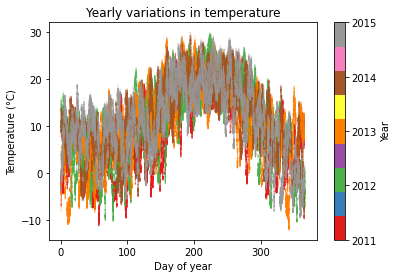

In [6]:
plt.scatter(x_train[:, 0], y_train, s=0.01, c=data_train.DATE.dt.year, cmap='Set1')
plt.colorbar(label='Year', ticks=np.unique(data_train.DATE.dt.year))
plt.xlabel('Day of year')
plt.ylabel('Temperature (°C)')
plt.title('Yearly variations in temperature')
plt.show()

So, for the day-of-year variations, it would make sense to put a center around 200 in order to capture the main annual fluctuation in temperature, as well as in the beginning and the end of range of values (0 and 356), and space a few others equally away from these three.

In order to better understand daily temperature variations, we should deseasonalize it by subtracting from each data point the average temperature of that day, which should make the trends in temperature more clear.

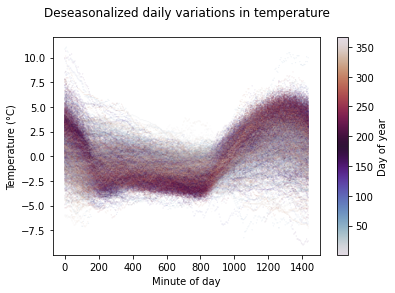

In [7]:
daily_avg_temp = pd.merge(data_train.assign(DAY=data_train.DATE.dt.normalize()),
                          data_train.groupby(by=pd.Grouper(key='DATE', freq='D')).mean().AIR_TEMPERATURE.rename(
                              'DAILY_AIR_TEMPERATURE'),
                          left_on='DAY', right_index=True).DAILY_AIR_TEMPERATURE.values

plt.scatter(x_train[:, 1], y_train - daily_avg_temp, c=x_train[:, 0], s=0.002, cmap='twilight')
plt.colorbar(label='Day of year')
plt.xlabel('Minute of day')
plt.ylabel('Temperature (°C)')
plt.title('Deseasonalized daily variations in temperature\n')
plt.show()

We can also plot the temperature in 3D being dependent on both time-of-day and day-of-year.

<IPython.core.display.Javascript object>


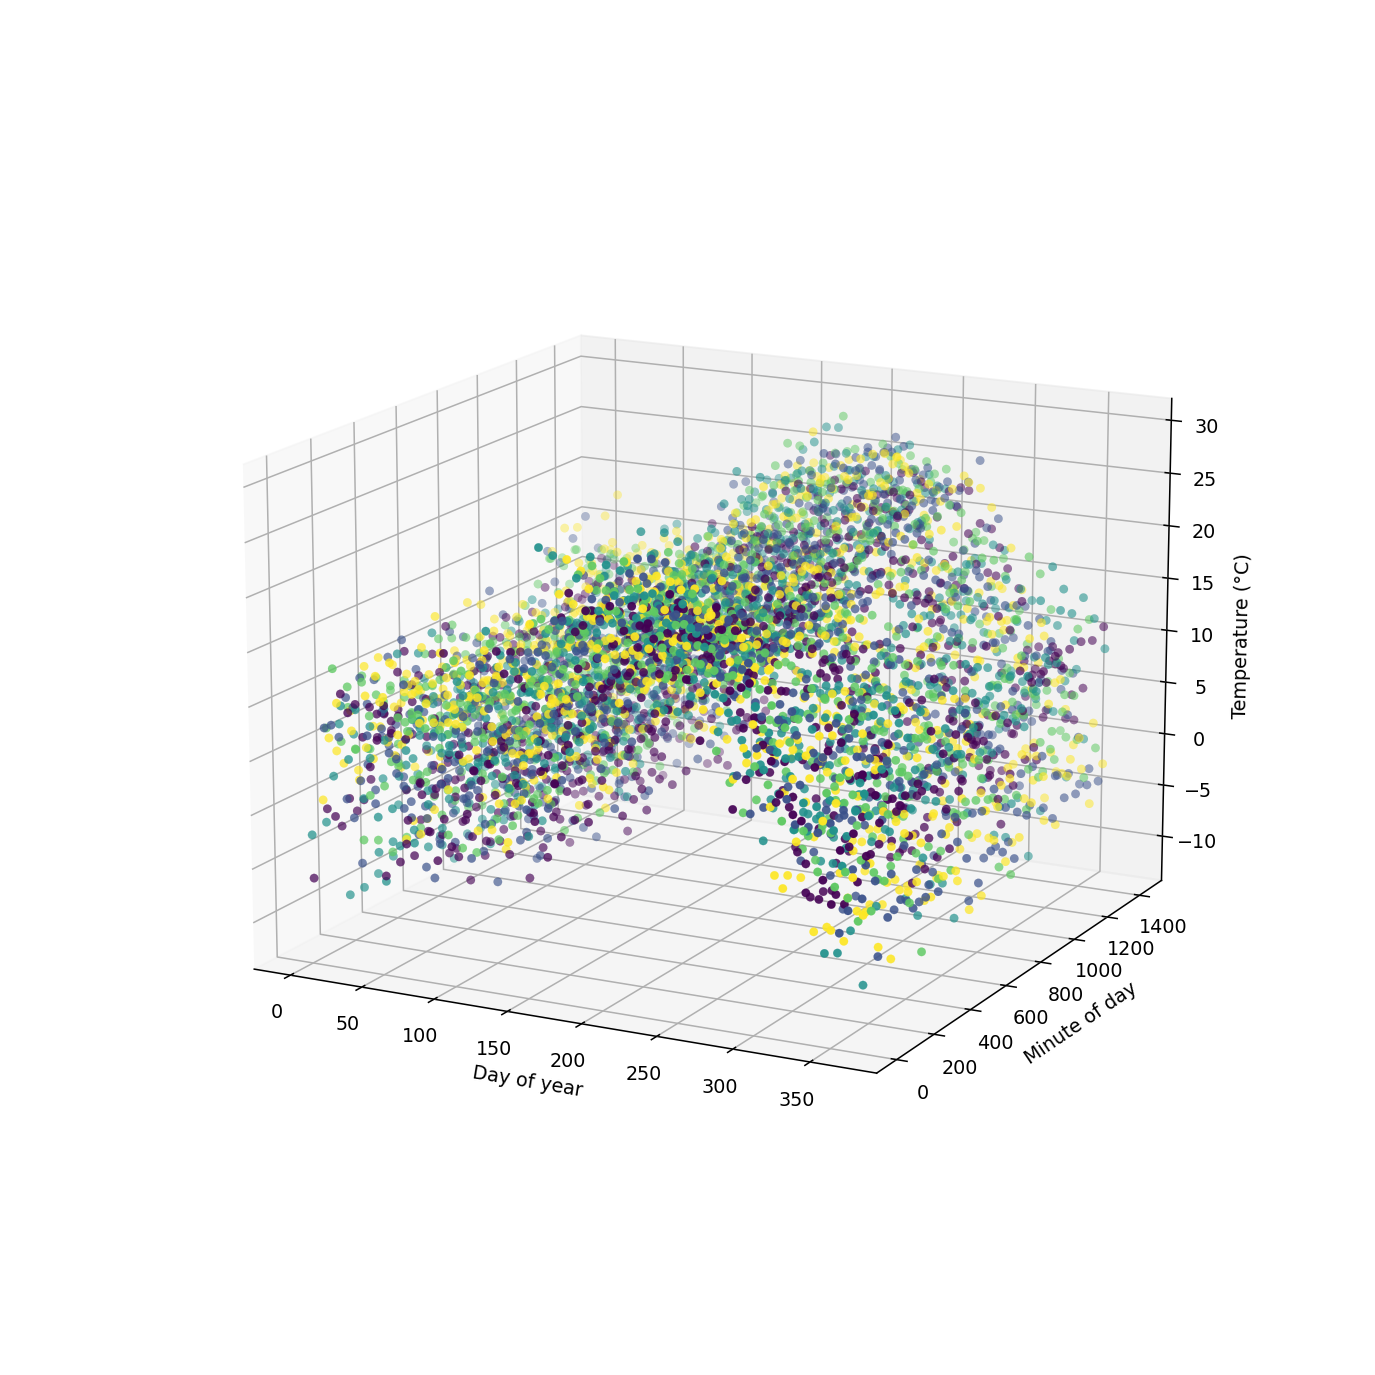

<Axes3DSubplot:xlabel='Day of year', ylabel='Minute of day'>

In [8]:
%matplotlib notebook
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.set_xlabel('Day of year')
ax.set_ylabel('Minute of day')
ax.set_zlabel('Temperature (°C)')
take_every = 100
ax.scatter(x_train[::take_every, 0], x_train[::take_every, 1], y_train[::take_every], 
           lw=0.1, c=data_train.DATE.dt.year.values[::take_every])
ax

## Setting up RBF

We can set sigma to be fairly large to capture the smoothness of the variations.

In [9]:
sigma = 1e5

centers = np.array(np.meshgrid(
    [1, 50, 100, 150, 200, 250, 300, 365],
    [0, 200, 400, 850, 1200, 1435],
)).T.reshape(-1, 2)


def get_rbf(x, sigma=sigma, centers=centers):
    scaling = np.array([1, x[:, 0].max() / x[:, 1].max()])
    return rbf_kernel(x * scaling, centers * scaling, gamma=1.0 / sigma)

## Modeling

In [10]:
alphas = [1e-10, 1e-5, 1e-1, 1e1, 1e2, 1e3]

x_train_rbf = get_rbf(x_train, sigma, centers)

grid_search = GridSearchCV(Ridge(), param_grid=dict(alpha=alphas))
grid_search.fit(x_train_rbf, y_train)

alpha = grid_search.best_params_['alpha']
print('Best alpha:', alpha)

Best alpha: 1e-10


Now we can look at the accuracy of the model on the training year if it takes into account only the yearly variations in temperature:

In [11]:
ridge_day = Ridge(alpha=alpha)
ridge_day.fit(rbf_kernel(x_train[:, :1], centers[:, :1], gamma=1 / sigma), y_train)

print("Yearly Test R² =", ridge_day.score(rbf_kernel(x_test[:, :1], centers[:, :1], gamma=1 / sigma), y_test))

Yearly Test R² = 0.5797587752282106


And if takes into account only the daily variations:

In [12]:
ridge_time = Ridge(alpha=alpha)
ridge_time.fit(rbf_kernel(x_train[:, 1:], centers[:, 1:], gamma=1 / sigma), y_train)

print("Daily Test R² =", ridge_time.score(rbf_kernel(x_test[:, 1:], centers[:, 1:], gamma=1 / sigma), y_test))

Daily Test R² = 0.04393261574595542


c:\users\breedoon\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.87951e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


And now we can combine them into a single model:

In [13]:
ridge_full = Ridge(alpha=alpha)
ridge_full.fit(x_train_rbf, y_train)

x_test_rbf = get_rbf(x_test, sigma, centers)
y_pred = ridge_full.predict(x_test_rbf)
print("Combined Test R² =", ridge_full.score(x_test_rbf, y_test))

Combined Test R² = 0.6309976116815921


And finally, we can visualize this model's prediction for the test year.

<IPython.core.display.Javascript object>


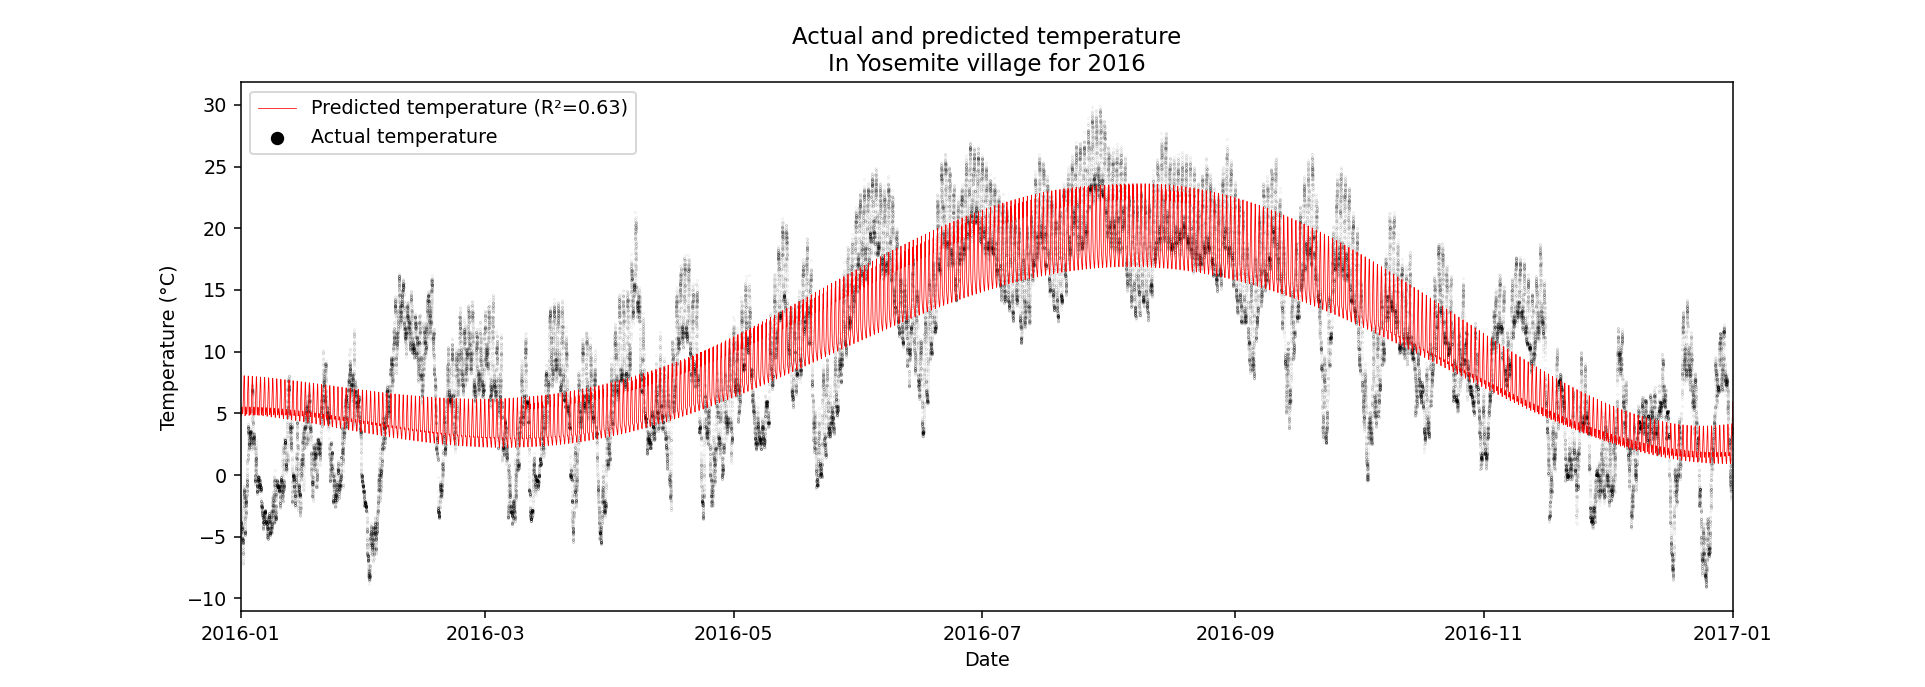

In [14]:
plt.figure(figsize=(14, 5))
plt.scatter(data_test.DATE, data_test.AIR_TEMPERATURE, color='k', s=0.001)
plt.plot(data_test.DATE, y_pred,
         label=f'Predicted temperature (R²={round(ridge_full.score(x_test_rbf, y_test), 2)})',
         color='red', lw=0.4)

plt.scatter([], [], c='k', label='Actual temperature')  # for legend
plt.legend(loc='upper left')
plt.title('Actual and predicted temperature\n'
          'In Yosemite village for 2016')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xlim(data_test.DATE.min(), data_test.DATE.max())
plt.show()

# Classification of Linearly Inseparable Data with **_Support Vector Machines_**

In [1]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

In [2]:
def get_data(n=1000, eff_size=3):
    """
    Generates data with 4 gaussians, whose means are `eff_size` apart.
    Points from every other gaussian would be classified as True
    """
    sub_n = n // 4
    x = np.hstack([
        np.random.normal(0, size=sub_n),
        np.random.normal(2 * eff_size, size=sub_n),
        np.random.normal(eff_size, size=sub_n),
        np.random.normal(3 * eff_size, size=sub_n),
    ]).reshape(-1, 1)
    y = np.hstack([
        np.zeros(sub_n * 2, bool),
        ~np.zeros(sub_n * 2, bool),
    ])
    return x, y


In [3]:
n = 1000
x, y = get_data(eff_size=4)

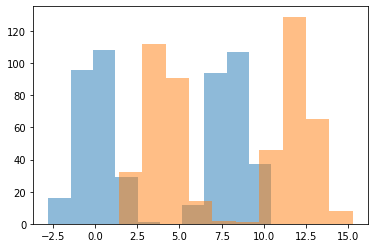

In [4]:
plt.hist(x[:n // 2], alpha=0.5)
plt.hist(x[n // 2:], alpha=0.5)
plt.show()

In [5]:
test_size = 1000
eff_size = 5
max_train_n = 50000
n_attempts = 100

x_test, y_test = get_data(n=test_size, eff_size=eff_size)

train_times = [] * max_train_n
classif_times = [] * max_train_n
accuracies = [] * max_train_n
ns = np.geomspace(4, max_train_n, n_attempts, dtype=int)
for n in ns:
    x_train, y_train = get_data(n, eff_size)

    t = time()
    model = SVC().fit(x_train, y_train)
    train_times.append(time() - t)

    t = time()
    y_pred = model.predict(x_test)
    classif_times.append(time() - t)

    accuracies.append(accuracy_score(y_test, y_pred))

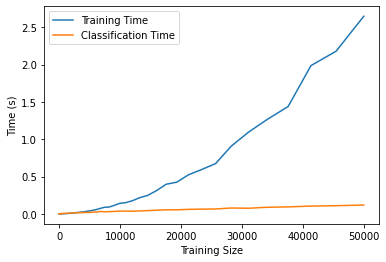

In [6]:
plt.plot(ns, train_times, label='Training Time')
plt.plot(ns, classif_times, label='Classification Time')
plt.xlabel('Training Size')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

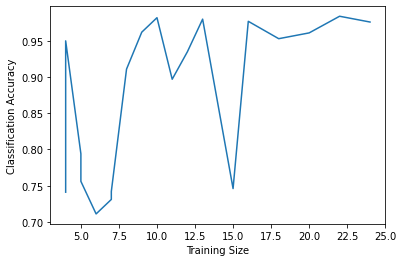

In [7]:
plt.plot(ns[:20], accuracies[:20])
plt.ylabel('Classification Accuracy')
plt.xlabel('Training Size')
plt.show()

# Associative Memory with **_Hopfield Recurrent Neural Network_**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from scipy.optimize import minimize


In [2]:
class HopfieldNetwork:
    def __init__(self, neurons_n=10, memories=None):
        """
        :param neurons_n: number of neurons, must be equal to dimensionality of memories.
        :param memories: an NxP array containing N memories; if not None, neurons_n is set to P.
        """
        if memories is not None:
            neurons_n = memories.shape[1]

        self._weights = np.zeros((neurons_n, neurons_n))
        self._memories_n = 0

        if memories is not None:
            self.add_memories(memories)

    def get_closest_memory(self, state: np.array, max_iter=10):
        prev = state.copy()
        nxt = state.copy()
        for _ in range(max_iter):
            nxt = self._get_next_step(nxt)
            if (nxt == prev).all():  # converged  (i.e., hasn't changed since last iteration)
                break
            prev = nxt
        return nxt

    def get_closest_memories(self, states, **kwargs):
        restored_memories = [] * len(states)
        for state in states:
            restored_memories.append(self.get_closest_memory(state, **kwargs))
        return restored_memories

    def add_memories(self, memories):
        memories = self.preprocess_memories(np.array(memories))
        old_weights_sum = self._weights * self._memories_n
        new_weights_sum = (memories.reshape(memories.shape[0], memories.shape[2], 1)  # multiply each of`shape[0]`
                           @ memories.reshape(memories.shape[0], 1, memories.shape[2])  # by its transpose
                           ).sum(axis=0)
        self._memories_n += len(memories)
        self._weights = (old_weights_sum + new_weights_sum) / self._memories_n

    def add_memory(self, memory):
        self.add_memories([memory])

    def _get_next_step(self, to):
        return np.sign((to @ self._weights) / len(self._weights))

    @staticmethod
    def preprocess_memories(memories: np.array):
        """
        Converts all positive elements to 1s, and the rest to -1s
        """
        return (-1 * (memories <= 0) + 1 * (memories > 0)).reshape(len(memories), -1)[:, np.newaxis, :]


Now we can try to make the network learn three digits from the MNIST dataset and then ask it to recall them from a sketch:

In [3]:
digits = load_digits()

In [4]:
use_digits = [0, 3, 6]
hop_net = HopfieldNetwork(memories=digits.data[use_digits])  # take first instances of each of chosen digits

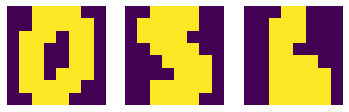

In [5]:
# Remember what 3, 5, and 6 look like
preprocessed_memories = HopfieldNetwork.preprocess_memories(digits.data[use_digits])
fig, axes = plt.subplots(1, len(use_digits))
for i, ax in enumerate(axes):
    ax.imshow(preprocessed_memories[i].reshape(8, 8))
    ax.axis('off')

(-0.5, 7.5, 7.5, -0.5)

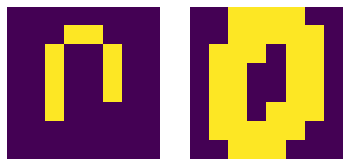

In [6]:
# Try to recall a zero from an incomplete graph
fig, axes = plt.subplots(1, 2)
guess = np.array(
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
]).flatten()

axes[0].imshow(guess.reshape(8, 8))
axes[0].axis('off')

matched_memory = hop_net.get_closest_memory(guess)
axes[1].imshow(matched_memory.reshape(8, 8))
axes[1].axis('off')


(-0.5, 7.5, 7.5, -0.5)

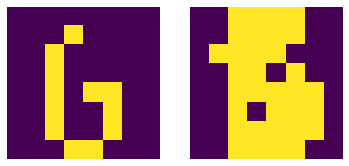

In [7]:
fig, axes = plt.subplots(1, 2)
guess = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 1, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
]).flatten()

axes[0].imshow(guess.reshape(8, 8))
axes[0].axis('off')

matched_memory = hop_net.get_closest_memory(guess)
axes[1].imshow(matched_memory.reshape(8, 8))
axes[1].axis('off')


In [8]:
def verify_capacity(neurons_n, memories_n):
    """
    Returns whether a Hopfild network with `neurons_n` neurons should be able to store `memories_n` memories.
    """
    random_memories = np.random.choice([-1, 1], (memories_n, neurons_n))
    corrupted_random_memories = random_memories.copy()
    corrupted_random_memories[:, np.random.randint(0, neurons_n)] *= -1  # jitter one bit

    return (np.array(HopfieldNetwork(memories=random_memories).get_closest_memories(corrupted_random_memories))
            == random_memories).all()


In [9]:
def get_max_capacity(neurons_n):
    """
    Returns the maximum number of memories a Hopfield network with `neurons_n` neurons can store.
    """
    return round(minimize(lambda x: -x[0] * verify_capacity(neurons_n, round(x[0])),
                          x0=[1], method='TNC', bounds=[(1, neurons_n)]).x[0])


In [10]:
neurons_ns = np.unique(np.geomspace(1, 1000, 20, dtype=int))
max_capacities = [get_max_capacity(n) for n in neurons_ns]

c:\users\breedoon\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\_numdiff.py:579: RuntimeWarning: invalid value encountered in true_divide
  J_transposed[i] = df / dx


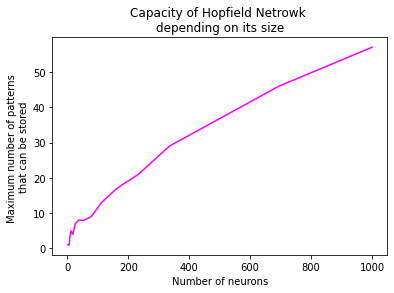

In [11]:
plt.plot(neurons_ns, max_capacities, color='magenta')
plt.title('Capacity of Hopfield Netrowk \ndepending on its size')
plt.ylabel('Maximum number of patterns \nthat can be stored')
plt.xlabel('Number of neurons')
plt.show()

The scaling behavior seems to be somewhat linear with a slope of about 0.05 memories per neuron.

# Fraud Detection with **_Kernel Density Estimation_**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

In [2]:
transactions = pd.read_csv('anonymized.csv')

In [3]:
transactions.Date = pd.to_datetime(transactions.Date, format='%d%b%Y')

monthly_transactions = transactions.groupby(pd.Grouper(key='Date', freq='M')).sum()

In [4]:
x = monthly_transactions.Amount.values.reshape(-1, 1)
x_plot = np.linspace(x.min(), x.max(), num=150)
kde = KernelDensity(kernel='gaussian', bandwidth=x.std() / 2)
kde.fit(x)
y_plot = np.exp(kde.score_samples(x_plot.reshape(-1, 1)))

In [5]:
n_samples = 10
x_samp = kde.sample(n_samples)

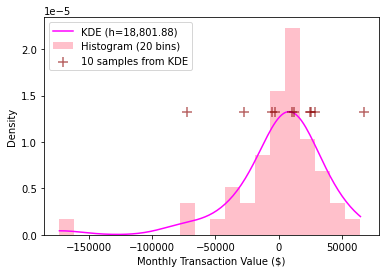

In [6]:
plt.plot(x_plot, y_plot, color='magenta', label='KDE (h={:,.2f})'.format(kde.bandwidth))
plt.hist(monthly_transactions.Amount, density=True, color='pink', bins=20, label='Histogram (20 bins)')
plt.scatter(x_samp, np.repeat(y_plot.max(), n_samples),
            zorder=3, color='darkred', marker='+', alpha=0.6, s=100, label=f'{n_samples} samples from KDE')
plt.legend()
plt.xlabel('Monthly Transaction Value ($)')
plt.ylabel('Density')
plt.show()

# Topic Modeling with **_Latent Dirchlet Allocation_**

In [1]:
import re

from sklearn.decomposition import LatentDirichletAllocation
from stop_words import get_stop_words
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
with open('1998-0.txt', encoding='utf-8') as f:  # Also sprach Zaratustra
    full_text = f.read()

In [3]:
NON_ALPHABETICAL = re.compile('[\W_^0-9]+', re.UNICODE)
words = [' '.join([NON_ALPHABETICAL.sub('', word).lower() for word in paragraph.split()
                   if word.strip().lower() not in get_stop_words('english')])
         for paragraph in full_text.split('\n\n')]  # double new line separates paragraphs

In [4]:
# max_df to cut off words that are too frequent like names or unidentified stop-words
# min_df to remove words that are too rare such as typos or meta data
cv = CountVectorizer(stop_words='english', max_df=0.1, min_df=0.001)

x = cv.fit_transform(words)

In [11]:
# Check accuracy on actual clusters
true_clusters = np.loadtxt("questionnaire_answers.csv", delimiter=",")

(people.argmax(axis=1) == true_clusters).sum() / n_people

0.982

In [5]:
lda = LatentDirichletAllocation(n_components=10, max_iter=100)
lda.fit(x)

LatentDirichletAllocation(max_iter=100)

In [6]:
for i, topic in enumerate(lda.components_):
    print(f'Topic {i + 1}:')
    print(', '.join([cv.get_feature_names()[i] for i in topic.argsort()[-10:]]) + '\n')

Topic 1:
day, thee, verily, thyself, death, soul, life, new, unto, thy

Topic 2:
shall, time, voice, woman, love, man, came, said, unto, spake

Topic 3:
great, long, laughter, tell, higher, men, shall, chapter, brethren, ye

Topic 4:
higher, says, life, discourse, works, gutenbergtm, nietzsches, work, project, nietzsche

Topic 5:
doth, thy, hath, small, heaven, earth, great, body, soul, spirit

Topic 6:
doth, thing, wanteth, world, great, things, evil, hath, good, man

Topic 7:
lie, spirit, good, little, wise, like, god, thee, man, old

Topic 8:
thyself, said, shadow, wilt, friend, like, hast, art, thy, thee

Topic 9:
live, verily, shall, higher, men, let, virtue, ones, love, ye

Topic 10:
yea, sit, learned, wisdom, old, come, good, ah, long, hath



# Image Classification with **_Deep Learning_**

To build a model classifying clothes into male and female we will be using the same dataset of [male](https://course-resources.minerva.kgi.edu/uploaded_files/mke/nA93zn/male-clothing.zip) and [female](https://course-resources.minerva.kgi.edu/uploaded_files/mke/VL14ar/female-clothing.zip) clothing, this time using Support Vector machines and a pre-trained deep neural network. 

## Preparing the data

Since VGG16 (the pre-trained model) was built on 224x224 images, we would resize our images to that resolution. We can compress them further and use some form of dimensionality reduction like PCA for the SVMs as well, but it would be a more interesting task to use as much data as we have to achieve an absolute maximum performance these models can achieve.

The metric we can use to measure the models' performance is accuracy, since the dataset is well-balanced (because for an unbalanced dataset accuracy might be misleading), and it also treats true negatives equally as true positives (unlike f-1 score), and false positives equally as false negatives (unlike precision or recall), and we don't have any reason to prefer performance on male or female clothes over the other. Also, accuracy is pretty straightforward to interpret (while keeping in mind that in an equally split dataset a random classifier would achieve ~0.5).

In [1]:
import numpy as np
from keras.applications import vgg16
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras_preprocessing.image import ImageDataGenerator
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier

In [2]:
# Directory containing the Man's Clothing and Woman's Clothing subfolders
fashion_dir = r"C:\Users\breedoon\Downloads\Fashion Dataset"
target_im_size = (224, 224)  # default vgg16 input size

In [3]:
img_gen = ImageDataGenerator(rescale=1 / 255).flow_from_directory(fashion_dir,
                                                                  target_size=target_im_size,
                                                                  class_mode='binary',
                                                                  batch_size=1)
x, y = tuple(zip(*[img_gen[i] for i in range(len(img_gen))]))  # cannot do just *img_gen because will run infinitely
x, y = np.array(x)[:, 0, ...], np.array(y)[:, 0]

x_flat = x.reshape(x.shape[0], -1)

Found 2512 images belonging to 2 classes.


In [5]:
x_train, x_test, x_flat_train, x_flat_test, y_train, y_test = train_test_split(x, x_flat, y, train_size=0.8)

## SVMs

We will train an SVM wit three different kernels: a linear one, a polynomial one, and an RBF one. For each of them we would cross-validate to find the best value of C (controlling the error margin), and then calculate the test accuracies.

In [7]:
kernels = [
    dict(kernel='linear'),
    dict(kernel='poly', degree=2),
    dict(kernel='rbf'),
]
for kernel_params in kernels:
    grid_params = dict(C=[0.001, 0.1, 1, 10, 1000], **({k: [v] for k, v in kernel_params.items()}))

    grid_search = GridSearchCV(SVC(), param_grid=grid_params)
    grid_search.fit(x_flat_train, y_train)
    best_params = grid_search.best_params_

    model_svm = SVC(**best_params, C=10)
    model_svm.fit(x_flat_train, y_train)

    y_pred = model_svm.predict(x_flat_test)
    print('Kernel:', kernel_params['kernel'])
    print('Test Accuracy:', accuracy_score(y_test, y_pred), '\n')

Kernel: linear
Test Accuracy: 0.6284095427435387 

Kernel: poly
Test Accuracy: 0.6821471172962226 

Kernel: rbf
Test Accuracy: 0.7218489065606361 



## Deep Learning Network

First, we would load the VGG16 model without the top layers and perform transfer learning by putting a single trainable layer with a sigmoid activation function (since we're doing binary classification) which would serve as the output of the model. Additionally, we would need to use a flatten layer to reshape the 224x224x3 input into 151,875-size output. Then, to prevent overfitting, we can put a dropout layer between the flatten and the sigmoid layers with varying dropout rates, which would serve as a regularization technique by occasionally dropping out some of the 151,875 connections while training, so that the model does not unreasonably learn to rely on only a few portion of them. We will use binary crossentropy as our loss function simply because we're doing binary classification, and there doesn't seem to be a better-suited loss function for that purpose.

In [8]:
model_raw = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(*target_im_size, 3))


In [9]:
def get_dnn_model(dropout_rate=0.0):
    flatten_layer = Flatten()
    dropout_layer = Dropout(rate=dropout_rate)
    output_layer = Dense(1, activation='sigmoid', name='clothes_output')

    raw_input = model_raw.input
    new_output = output_layer(dropout_layer(flatten_layer(model_raw.output)))

    model = Model(raw_input, new_output)

    # Freeze native VGG layers to not bother retraining them
    for layer in model.layers[:len(model_raw.layers)]:
        layer.trainable = False

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


Then, we would perform cross-validation to find the optimal dropout rate and the number of epochs to train the model for.

In [10]:
grid_params = dict(dropout_rate=[0.1, 0.3, 0.5, 0.7, 0.9], epochs=[5, 10, 20])

model = KerasClassifier(build_fn=get_dnn_model)
grid_search = GridSearchCV(model, param_grid=grid_params, cv=3)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print('Best params:', best_params)

Best params: {'dropout_rate': 0.5, 'epochs': 20}


In [11]:
model = get_dnn_model(dropout_rate=best_params['dropout_rate'])
model.fit(x_train, y_train, batch_size=1, epochs=best_params['epochs'], validation_split=0.1)

Epoch 1/10
 616/2009 [==========>...................] - ETA: 58s - loss: 1.7388 - accuracy: 0.5900

limit_output extension: Maximum message size of 100000 exceeded with 100126 characters

In [12]:
print('Train Accuracy:', accuracy_score(y_train, model.predict(x_train).round()))
print('Test Accuracy:', accuracy_score(y_test, model.predict(x_test).round()))

Train Accuracy: 0.9925335988053758
Test Accuracy: 0.8500497017892644


## Summary

So, using an unreduced dataset with extensive cross-validation, the neural network was able to achieve an astounding 85% accuracy on the training data while the SVM lagged behind with only 72%, which, compared to liner regression's maximum 68% does not seem like a huge improvement. This all comes at a cost of about equal grid-search time for both models (~4 hours). The time could've been brought down by reducing the dimensionality of the data, but since the goal was to achieve an absolute maximum, this might have resulted in lower performance of both models.

Given that, the DNN seems to be the superior technique to classify images, which shouldn't come as a surprise given it was trained in the first place for that purpose, and also contains far more (sometimes deliberately placed) parameters, compared to a more general-purpose SVM which was trained on the spot. On the other hand, a liner regression took considerably less time to be trained and achieved a comparable level of accuracy as SVM (68% vs 72%), which might be the consequence of the data (a set of images) not being well suited for either of the two techniques, with only properly configured DNN managing to handle it well. 

# Language Processing with **_Markov Chains & Hidden Markov Models_**


## Language Detection

### Problem Statement

There are three languages: A, B and C. Each language uses the same set of symbols: "A, o, e, t, p, g, and k." However, each language uses the symbols differently. In each of these languages we can model everything as P(next symbol | current symbol) with Markov Chains.

### Data preparation

In [1]:
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, homogeneity_score
from hmmlearn.hmm import MultinomialHMM

In [2]:
symbol_dir = r'C:\Users\breedoon\Downloads\symbol'

symbol_files = listdir(symbol_dir)

symbols = []
test_symbols = []

files = []

for file in symbol_files:
    with open(symbol_dir + '\\' + file) as f:
        if 'test' not in file:  # the train files don't seem to have labels, so just excluding them
            files.append(file)
            symbols.append(f.read())
        else:
            test_symbols.append(f.read())

In [3]:
seed = 1456418

full_df = (pd.DataFrame(pd.Series(files).str.split('-').tolist()).rename({2: 'language'}, axis=1)
    .assign(string=symbols)[['string', 'language']])

train_df, test_df = train_test_split(full_df, test_size=0.1, random_state=seed)

## Training

The first step to make a prediction for a Markov chain is to generate an $n\times n$ matrix $C$ (with $n$ being the number of unique states), where $C_{ij}$ is the number of times state $i$ transitions to state $j$. Then, we would calculate a transition matrix which would convert the counts into probabilities, where each element in the transition matrix is given by $T_{ij} = \frac{C_{ij}}{\sum_{i=1}^n C_{ij}}$, i.e., the probability of transitioning to state $j$ give we're in state $i$ (meaning $i$th column sums up to 1). Additionally, we need to calculate the vector of initial distributions $\pi$, so that $\pi_i$ is the probability of $i$th state to be the first one in the sequence (for $i \in 1...n$).

In order to make a prediction, we first (in `get_likelihood()`) calculate the likelihood of the given sequence of states given each of the Markov models (languages). To do that, we would first create a count matrix for the sequence (where $C_{ij}$ is the number of times state $i$ transitions to state $j$), and then we would use it to calculate the likelihoods for each of the Markov models as follows: $\begin{aligned}[t]
P(sequence|model) 
    &= P(seq_1|model) \cdot P(seq_2|seq_1, model) \cdot ... \cdot P(seq_{n-1}|seq_n, model) \\
    &= \pi_{s_1} \cdot T_{s_1s_2} \cdot T_{s_2s_3} \cdot ... T_{s_{n-1}s_n} \\
    &= \pi_{s_1} \cdot \prod_i \prod_j T_{ij}^{C_{ij}}
\end{aligned}$

where $seq_n$ is the $n$th state in the sequence, $p_{s_1}$ is the initial probability of the first state in the given sequence to occur in the model, and $T_{ij}^{C_{ij}}$ is the probability of each transition in the sequence to occur in that model, raised to the power of the number of times it appears in the sequence.

Then, in `get_posteriors()`, to finally get the probability of each model given the sequence, $P(model|sequence)$, we apply Bayes theorem as: $P(model_k|sequence) = \frac{P(sequence|model_k)P(model_k)}{\sum_k P(sequence|model_k)}$, where $P(model_k)$ is the prior (assumed to be flat). 

To make the final prediction (in `predict()`), we simply take the index of the model whose posterior is largest and return it as the most probable source of the sequence.


In [4]:
def get_transition_counts(string: str):
    """
    Returns a transition dataframe based on given string,
    Where df['b']['a'] is the number of transitions from 'a' to 'b'.
    """
    df = pd.DataFrame(list(string))
    return (df.assign(old_state=df[0].shift(-1))  # shift one back to get old state
            .assign(new_state=1)  # to count transitions in groupby
            .groupby([0, 'old_state']).count()
            .unstack().fillna(0)  # unstack into wide format
            .droplevel(0, axis=1)  # remove multi-level indexing
            .transpose())  # so that new state is rows and old state is columns


def get_transition_matrix(list_of_strings, symbols=None):
    """
    Returns a transition matrix of a list of strings
    """
    if symbols is None:
        symbols = np.sort(np.unique(list(pd.Series(list_of_strings).sum())))
    # Initialize empty matrix with 0s
    transition_matrix = pd.DataFrame(0, index=pd.Series(symbols, name='new_state'),
                                     columns=pd.Series(symbols, name='old_state'))
    for string in list_of_strings:
        transition_matrix = transition_matrix.add(get_transition_counts(string), fill_value=0)

    return transition_matrix.div(transition_matrix.sum(axis=0), axis=1).fillna(0)  # make sure sums to 1 in each row)


def get_initial_distribution(list_of_strings, symbols=None):
    """
    Returns a Series where index is each of the unique symbols found in strings,
    and values are their relative frequencies in the beginning of strings (sums to 1);
    If `symbols` is passed, ensures all symbols are in result, even if not found (with value 0)
    """
    unique, counts = np.unique([string[0] for string in list_of_strings], return_counts=True)
    if symbols is not None:
        missing_symbols = list(set(symbols) - set(unique))
        unique = np.hstack([unique, missing_symbols])
        counts = np.hstack([counts, [0] * len(missing_symbols)])
    dist = pd.Series(counts, index=unique)
    return dist.sort_index() / dist.sum()


def get_likelihood(string, initial_distribution, transition_matrix):
    """Returns the probability of string given the initial distribution and transition matrix of a language"""
    return initial_distribution[string[0]] * np.product(np.product(transition_matrix ** get_transition_counts(string)))


def get_posteriors(string, initial_distributions, transition_matrices, priors=None):
    """
    Returns posteriors of the string being generated by each of the languages,
    If `priors` is None, assumes flat prior.
    """
    if priors is None:
        priors = np.full(len(initial_distributions), 1) / len(initial_distributions)
    likelihoods = [get_likelihood(string, id, tm) for id, tm in zip(initial_distributions, transition_matrices)]
    return priors * likelihoods / sum(likelihoods)  # Bayes theorem!


def predict(*args, **kwargs):
    """Returns the index of the language with maximum posterior"""
    return np.argmax(get_posteriors(*args, **kwargs))


In [5]:
transition_matrices = []
initial_distributions = []
for lang in train_df.language.unique():
    strings = train_df[train_df.language == lang].string
    transition_matrices.append(get_transition_matrix(strings))
    initial_distributions.append(get_initial_distribution(strings))

In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # display only last 3 digits
transition_matrices[1]  # langB

old_state     A     e     g     k     o     p     t
new_state                                          
A         0.618 0.061 0.090 0.050 0.069 0.044 0.068
e         0.053 0.609 0.066 0.053 0.055 0.088 0.071
g         0.074 0.053 0.588 0.062 0.050 0.085 0.081
k         0.056 0.077 0.069 0.588 0.060 0.044 0.058
o         0.069 0.055 0.064 0.082 0.620 0.073 0.063
p         0.084 0.066 0.048 0.079 0.077 0.593 0.066
t         0.046 0.079 0.074 0.085 0.069 0.073 0.593

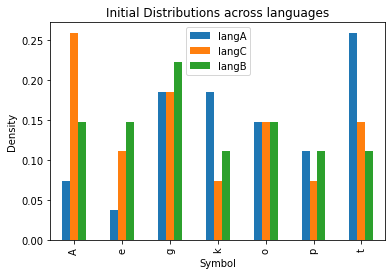

In [7]:
languages = train_df.language.unique()
pd.DataFrame(initial_distributions, index=languages).transpose().plot.bar()
plt.ylabel('Density')
plt.xlabel('Symbol')
plt.title('Initial Distributions across languages')
plt.show()

## Testing

In [8]:
# list of 0, 1 or 2 - classes (indices of languages)
predictions = []
for string, true_lang in zip(test_df.string, test_df.language):
    predictions.append(predict(string, initial_distributions, transition_matrices))

test_df.assign(prediction=languages[predictions])

string language prediction
17  ogogogogopopeppepokegogekogepegogAgAgepetteAtg...    langA      langA
31  AoeoAoeoAtetegeoegAteoegAoetAgtAtAoeoeoAoAgAoe...    langB      langB
33  oetAoAtApoAoegAtetetAgAoAtAoAptAgtooeAgegAtAoA...    langB      langB
35  oeooAeoeoetAtAtAteteteeeoepoAgAggAtteoeoAtgete...    langB      langB
5   kogAptegAtAkkepApAtkApetttgegAkekegokApoAketep...    langA      langA
60  ppoooootttkkkttoppppAAeeopppekkkgggtttttttkkAA...    langC      langC
72  ooooooooAAAAookeeAkkkkoooppgggppotteekkgeepptt...    langC      langC
26  pAkApotpeketptkpotkeekAgopAApgAetgeketAkAtpgAk...    langA      langA
73  ttttAAAAAttAAppopppkkkeeeokkttgteppppppgttkkAA...    langC      langC

In [9]:
# convert true languages to their indices
true_languages = pd.Series(range(len(languages)), index=languages)[test_df.language]

print('Test accuracy:', accuracy_score(true_languages, predictions))

Test accuracy: 1.0


In [10]:
# Posterior distributions of the unlabeled tests

# Suppress scientific notation
np.set_printoptions(suppress=True)

posteriors = []
for string in test_symbols:
    posteriors.append(get_posteriors(string, initial_distributions, transition_matrices))

pd.DataFrame(posteriors, index=test_symbols, columns=('P(' + languages + ')'))

P(langA)  P(langC)  \
pppooootgAookggggtttopAtttkkkeeggeeeeAAAgtkoAkk...     0.000     0.333   
gooooAAAAAAAAAkkkkkkooooAAAeppppppgeeeeepAAppee...     0.000     0.333   
ekogoAgkepokogoppAttpAttgeekApegepApotpAAtpetgA...     0.333     0.000   
AtAgegegegAgegetoAtetAogAooAoeAtegAgeotAoAgoetA...     0.000     0.000   
popoktgopogettpegAtkegotkogettpApepApegtgApeogo...     0.333     0.000   
okopottogttpetgopopotkepeppAgAgetpotpAtgookettg...     0.333     0.000   
kteoeoeoAoteoAgeoetoegAgeoekgeteoegetetAgeAoAtt...     0.000     0.000   
tgAkoggAggAtpetkpAgegAgkepepookepepekogokogetke...     0.333     0.000   
oeeoppppppoooAgggggoAAoookkppeoAApeoAkAAAAAAApk...     0.000     0.333   
ApgotgAApogotgopAgegAtkAgketgAtkpAgottpopopAgpe...     0.333     0.000   

                                                    P(langB)  
pppooootgAookggggtttopAtttkkkeeggeeeeAAAgtkoAkk...     0.000  
gooooAAAAAAAAAkkkkkkooooAAAeppppppgeeeeepAAppee...     0.000  
ekogoAgkepokogoppAttpAttgeekApegepApotpAAtpetgA...     0.000  
AtAgegegegAgegetoAtetAogAooAoeAtegAgeotAoAgoetA...     0.333  
popoktgopogettpegAtkegotkogettpApepApegtgApeogo...     0.000  
okopottogttpetgopopotkepeppAgAgetpotpAtgookettg...     0.000  
kteoeoeoAoteoAgeoetoegAgeoekgeteoegetetAgeAoAtt...     0.333  
tgAkoggAggAtpetkpAgegAgkepepookepepekogokogetke...     0.000  
oeeoppppppoooAgggggoAAoookkppeoAApeoAkAAAAAAApk...     0.000  
ApgotgAApogotgopAgegAtkAgketgAtkpAgottpopopAgpe...     0.000

## Speaker identification

### Problem Statement

There are three people in a room. Each says about 10 phonemes before being randomly interrupted by someone else. When they speak they all sound the same, however each person tends to use different phonemes in their speech. Specifically, we can model the following transition probabilities that someone will interrupt the current speaker: P(speaker i at time t+1 | speaker j at time t). We can also model the probability over phonemes given a particular speaker: P(phoneme | speaker i). 

In [11]:
speakers_file = r'speaker.txt'

with open(speakers_file) as f:
    string = f.read()

In [12]:
n_speakers = 3
unique_symbols = sorted(set(string))

# Series to map each symbol onto its index
symbols = pd.Series(range(len(unique_symbols)), index=unique_symbols)
symbols

A    0
e    1
g    2
k    3
o    4
p    5
t    6
dtype: int64

### Initializing parameters

To begin the process, we first initialize meaningful values for 3 parameters:

$T$ - transition matrix, where $T_{ij}$ is the probability of transitioning from (hidden) state $i$ to state $j$. Can be initialized to meaningful values based on the known fact that each speaker pronounces about 10 phonemes at a time before transitioning, which can translate into the probability of approximately 90% of each state to stay (the diagonal) and 5% to transition to each of the other states.

$\pi$ - vector of initial probability distribution of the states so that $\pi_i$ is the probability that the first state in the sequence is state $i$ (initialized to be approximately equal for each of the hidden states).

$E$ - emission matrix, where $E_{jk}$ - probability of state $j$ to produce emission $k$ (a $3\times7$ matrix given 3 states and 7 observations where rows sum up to 1). Initialized to approximately equal distribution of emissions for each hidden state.

Additionally, in order to avoid initializing identical values for the parameters of all the states (so that they don't all converge to the same solution as a result of EM algorithm), we would take a sample from a Dirichlet distribution giving it the pre-initialized values as the alpha parameter so that the resulting probability does resemble the meaningful relationship (e.g., 90% to not transition and 5% to transition to each other state) but also is not identical across all states.

In [13]:
# Initialize to approximately 90% of speaker staying the same (the diagonal) and ~10% to change (split among the rest)
transition_matrix = np.array([np.random.dirichlet(dist) for dist in 5 + np.diag([90] * n_speakers)])
transition_matrix

array([[0.90106925, 0.07590985, 0.0230209 ],
       [0.06249317, 0.88754501, 0.04996181],
       [0.01489817, 0.04029237, 0.94480946]])

In [14]:
initial_distribution = np.random.dirichlet([100] * n_speakers)
initial_distribution

array([0.34777775, 0.29560251, 0.35661974])

In [15]:
# approximately probability of each speaker to produce given symbol (rows - speakers - sum to 1)
emission_matrix = np.array([np.random.dirichlet([100] * len(symbols)) for _ in range(n_speakers)])
emission_matrix

array([[0.1296276 , 0.14513003, 0.14055432, 0.13943913, 0.15318656,
        0.16034876, 0.1317136 ],
       [0.14666135, 0.12932869, 0.14239467, 0.13789181, 0.15103387,
        0.13456875, 0.15812086],
       [0.14292134, 0.16060757, 0.14985047, 0.12254389, 0.12950327,
        0.14528189, 0.14929157]])

In [16]:
observations = symbols[list(string)].values
observations[:100]

array([1, 4, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 5, 2, 5, 5, 5, 4, 5, 5, 4, 2,
       4, 5, 5, 5, 2, 4, 5, 5, 4, 4, 5, 1, 2, 0, 0, 4, 0, 0, 0, 6, 0, 6,
       6, 6, 4, 4, 1, 5, 4, 4, 5, 5, 6, 1, 1, 1, 1, 4, 6, 5, 4, 5, 5, 5,
       1, 1, 4, 1, 5, 4, 4, 4, 5, 4, 5, 2, 4, 4, 4, 1, 5, 4, 1, 5, 4, 6,
       5, 4, 1, 2, 4, 2, 2, 2, 2, 2, 3, 1], dtype=int64)

## Training

The EM algorithm starts with an Expectation step at which we compute the probability of the observed sequence (with $n$ being the number of hidden states, $N$ - the number of observations, $x_t$ - hidden state at time $t$): 

$\begin{aligned}[t]
    p(s_{1:N})
        &= \sum_{j=1}^n p (s_{1:N}, x_t = j)
            & \begin{array}{r}
                \text{sum over probability of the sequence} \\
                \text{and each of the hidden states}
              \end{array} \\
        &= \sum_{j=1}^n p(s_{1: t}, x_t=j) p(s_{t+1: N}| x_{x_{t}=j})
            & \begin{array}{r}
                \text{Bayes theorem } \\
                \text{and Markov property}
              \end{array} \\
        &= \sum_{j=1}^n \alpha_{1:N}(j) \cdot \beta_{1:N}(j);
\end{aligned}$

Then, both $\alpha$ and $\beta$ can be defined with a recursive formula:

$\begin{aligned}[t]
    \alpha_t(j) 
        &= \sum_{i=0}^{n} \alpha_{t - 1}(j) \cdot E_{js_{t}} \cdot T_{ij};
            & \begin{array}{r}
                \text{probability of being in state } j \text{ at time } t \\ 
                \text{and see the emission that was actually observed}
              \end{array} \\
    \beta_t(j) 
        &= \sum_{i=0}^{n} \beta_{t + 1}(j) \cdot E_{is_{t+1}} \cdot T_{ji}; 
            & \begin{array}{r}
                \text{probability of observing all future events} \\ 
                \text{given we're in state } j \text{ at time } t
              \end{array} \
\end{aligned}$

given that:

$\begin{aligned}[t]
    \alpha_{0}(j) 
        &= \pi_j; \\
    \beta_{0}(j) 
        &= 1; \\
\end{aligned}$


Then, at the Maximization step, the new parameters are estimated as follows: 

$\begin{aligned}[t]
    T_{ij} 
        &= \frac{\sum_{t=1}^{N} p(x_t=i, x_{t+1}=j)}
                {\sum_{t=1}^N \sum_{k} P(x_t=i, x_{t+1}=k)};
            & \begin{array}{r}
                \text{sum of probabilities to transition} \\
                \text{from state } i \text{ to state } j \text{ across all times } t\\
                \text{over the sum of probabilities to transition} \\
                \text{from state } i \text{ to any state across all times } t\\
              \end{array} \\\\
    E_{jk} 
        &= \frac{\sum^N_{t=1, \text{if} s_t=k} p(x_t=j)}
                {\sum_{t=1}^N p(x_t=j)};
            & \begin{array}{r}
                \text{sum of probabilities of being in state } j \\ 
                \text{ at times where we observe emission } k \\
                \text{over the probabilities of being in state } j \\ 
                \text{at all times}
              \end{array} \\\\
    \pi_i 
        &= \alpha_1(i) \cdot \beta_1(i);
\end{aligned}$

Then, after several iterations between E- and M-step, the EM algorithm will (hopefully) converge to the most likely solution.

In [7]:
def forward(init_dist, trans_mat, emit_mat, obs, t=None):
    if t is None:
        t = len(obs) - 1
    if t == 0:
        alpha = np.zeros((len(init_dist), len(obs)))
        alpha[:, 0] = init_dist * emit_mat[:, obs[0]]
        alpha[:, 0] /= alpha[:, 0].sum()
        return alpha
    alpha = forward(init_dist, trans_mat, emit_mat, obs, t - 1)
    alpha[:, t] = (trans_mat.T @ alpha[:, t - 1]) * emit_mat[:, obs[t]]
    alpha[:, t] /= alpha[:, t].sum()  # normalize to avoid vanishing alpha
    return alpha


def backward(init_dist, trans_mat, emit_mat, obs, t=0):
    if t == len(obs):
        beta = np.zeros((len(init_dist), len(obs)))
        beta[:, len(obs) - 1] = np.ones(len(init_dist))
        return beta
    beta = backward(init_dist, trans_mat, emit_mat, obs, t + 1)
    beta[:, t - 1] = trans_mat @ (beta[:, t] * emit_mat[:, obs[t]])
    beta[:, t - 1] /= beta[:, t - 1].sum()
    return beta


def expect(init_dist, trans_mat, emit_mat, obs):
    alpha = forward(init_dist, trans_mat, emit_mat, obs)
    beta = backward(init_dist, trans_mat, emit_mat, obs)
    gamma = (alpha * beta)
    likelihoods = (alpha[:, np.newaxis, 0: -1] * trans_mat[:, :, np.newaxis]
                   * beta[np.newaxis, 0:, 1:] * emit_mat[np.newaxis, 0:, obs[1:]])
    return gamma, likelihoods, obs  # return obs to nicely fit into maximize()


def maximize(gamma, likelihoods, obs):
    symbols = np.unique(obs)
    new_trans_mat = np.sum(likelihoods, axis=2) / np.sum(likelihoods, axis=(1, 2))[:, np.newaxis]
    new_emit_mat = np.zeros(emission_matrix.shape)
    new_init_dist = gamma[:, 0]
    for s in range(len(symbols)):
        new_emit_mat[:, s] = np.sum(gamma[:, obs == symbols[s]], axis=1) / np.sum(gamma, axis=1)
    return new_init_dist, new_trans_mat, new_emit_mat


We can generate a test string based on the transition matrices from the language detection step, assuming 3 speakers speaking three different languages.

To assess the performance, we can use homogeneity score which would assess how much it is the case that each cluster has samples from a single class (ranging 0-1), with low scores indicating low homogeneity and thus worse performance.

In [20]:
def generate_string(target_str_len=1000, avg_len_per_speaker=10):
    """
    Generates a string based on the transition matrices and initial distributions of length `target_str_len`,
    So that every speaker on average says `avg_len_per_speaker` phonemes.

    :returns: tuple string, true_languages
    """
    str_len = target_str_len
    avg_len = avg_len_per_speaker
    std = avg_len / 10
    string = ''
    unique_symbols = transition_matrices[0].index
    true_langs = []
    for speaking_for in np.abs(np.random.normal(avg_len, std, size=str_len // avg_len)).astype(int):
        lang_i = np.random.choice(len(transition_matrices))
        string += np.random.choice(unique_symbols, p=initial_distributions[lang_i])
        true_langs.append(lang_i)
        for step in range(speaking_for):
            string += np.random.choice(unique_symbols, p=transition_matrices[lang_i][string[-1]])
            true_langs.append(lang_i)
    true_langs = np.array(true_langs)
    return string, true_langs


In [21]:
def plot_ground_truth(true_langs):
    for speaker_i in range(len(transition_matrices)):
        plt.bar(np.argwhere(true_langs == speaker_i)[:, 0], [1] * (true_langs == speaker_i).sum(),
                width=1, label=f'Speaker {speaker_i + 1}')
    plt.title('Ground truth of distribution of languages (speakers) over time')
    plt.xlabel('Position within the string ($t$)')
    plt.legend()
    plt.show()

Test string: AoAteoeoegetetetAgoeoAoAAoAgetegAgAoAgetAggAAAAAAooekkktoopppppokkttttokgttttoooooAtAAAgkktttpoekptt


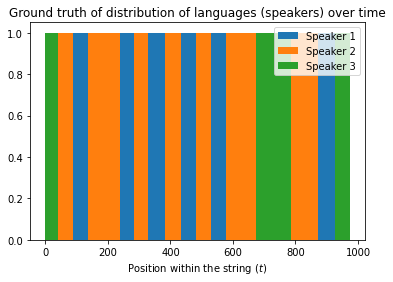

In [22]:
string, true_langs = generate_string(1000, 50)
print('Test string:', string[:100])
plot_ground_truth(true_langs)

In [9]:
def plot_posteriors(id, tm, em, obs):
    """Plots posteriors from HMM (`y`) as a stackplot"""
    # Get likelihoods
    y, _, _ = expect(id, tm, em, obs)
    y = y / y.sum(axis=0)
    
    plt.figure(figsize=(10, 5))
    plt.stackplot(range(len(observations)), y, labels=[f'Speaker {i}' for i in range(1, 4)])
    plt.xlabel('Position within the string')
    plt.ylabel('Probability of each speaker')
    plt.legend()
    plt.show()

In [8]:
# Set new (shorter) variables to preserve initial values
tm = transition_matrix.copy()
em = emission_matrix.copy()
id = initial_distribution.copy()
obs = observations.copy()

Homogeneity Score: 0.4286842055470264


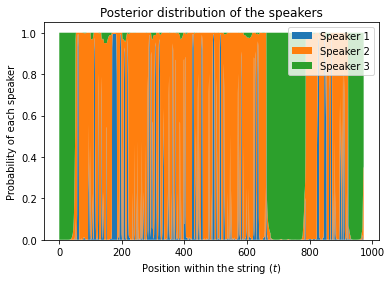

In [23]:
n_iter = 20

for _ in range(n_iter):
    id, tm, em = maximize(*expect(id, tm, em, obs))

print("Homogeneity Score:", homogeneity_score(true_langs, expect(id, tm, em, obs)[0].argmax(axis=1)))

plot_posteriors(id, tm, em, obs)

# Musical Key Detection with **_Maximum Likelihood Estimation_**


## Problem Definition

### Background

Musical key is an important aspect to consider when working with music. Two identical melodies but in different keys would sound very similar if played separately but when played together most likely would be very dissonant because of the difference in how their respective keys use notes of the same absolute pitch. This is why it is important for many applications such as music generation, or key auto-correction to know what key the incoming piece is written in, in order to interpret it correctly.

Each key is characterized by (1) its tonic node (one of the twelve: C, C#, D, D#, E, F, F#, G, G#, A, A#, B), and (2) the mode (major or minor), giving a total 24 possible keys. However, there are only 12 different natural scales (sets of notes *allowed* in the key), giving every major key its relative minor with a different tonic node but the same scale. For example, the C Major key (frequently denoted as just C) uses the following 7 notes: C, D, E, F, G, A, B, and its relative minor, A minor (denoted as Am), uses the same notes (usually written in a different order): A, B, C, D, E, F, G, while, for example, C minor (and its relative major D#) uses a noticeably different set of notes: C, D, D#, F, G, G#, A#.

In practice, the distinction between a key and its relative major/minor using the same scale is often a matter of interpretation rather than an unambiguous fact (like using different set of notes), and, given the fact that the chords and the notes within two relative keys serve almost the same harmonic function (e.g., the chord F used in C sounds almost identical to what it would sound in Am, but would be very distinct when used in the key of F), it would be a more practical task to simply detect which scale (one of 12 possible) the given piece is in, without trying to interpret whether it is major or its relative minor. This would be more than sufficient for the vast majority of applications while the removed ambiguity would result in far better performance of the key detector. 

However, even though the distinctions between different scales are stronger than between relative keys of the same scale, there is still some ambiguity when it comes to what notes are actually used in those scales. For example, in pieces written in C/Am, which are supposed to use only the 7 aforementioned notes (all notes with no '#'s), we could occasionally see G# or F# even though they are technically not part of the scale. So, being able to sort out the most relevant information from the given piece to detect which scale it most likely comes from, is the problem we will be trying to solve here.

### Data

The data we would be relying on a [huge database](magnet:?xt=urn:btih:7E26D029E2D0A0635E26C445594AC4D44E217A95&dn=130000_Pop_Rock_Classical_Videogame_EDM_MIDI_Archive%5b6_19_15%5d.zip&tr=udp%3a%2f%2ftracker.openbittorrent.com%3a80) of over 100,000 midi files in many different genres. Some of them might be corrupted, some of them won't have the information of what key they're in (which would make them difficult to use in a supervised learning problem), and some claim to be in the key of C (as the default one) but are actually not, so we would have to remove a considerable portion of the data as a result of data cleaning, but nonetheless they still should comprise a fairly representative data. 


## Solution Specification

### Multinomial MLE

Since the information about any given piece's key mostly comes from which notes are used in that key, (more so than than their relative order), it would be a reasonable simplification to treat the pieces as a bag of notes, converting each of them to a vector of frequencies.

To represent the notes computationally, the easiest solution would be to represent each of them by the number of semitones they are above the C (neglecting the octaves), so that C would be 0, C# would be 1, D would be 2, ..., and B would be 11. Here, we would also use a 0-indexed notation for consistency with the code.

The most intuitive way to estimate the source key of a given set of frequencies of notes is to assume they are sampled independently from a multinomial distribution. 

Let $p_j$ be the probability of $j$th note (for $j$ in $0...k$, $k=11$ for 12 notes) to occur in a key (with $\sum_{j=0}^{k}p_j = 1$) and $n_j$ be the number of this note actually being played (and $N = \sum_{j=0}^j n_j$ - the number of all notes). Then, the likelihood of $n$ to occur given $p$ is:
$\begin{aligned}[t]
    L_p(n)  
    &= \mathrm{p}=\frac{N!}{n_0! \cdot n_1! \cdot ... \cdot n_{k}!} \cdot p_0^{n_0} \cdot p_1^{n_1} \cdot ... \cdot p_{k}^{n_{k}} \\
    &= N! \cdot \prod_{j=0}^k\frac{p_j^{n_j}}{n_j!} \\
\end{aligned}$

To find the most likely $p$ for the observed $n$, we can, first, convert that likelihood to log-likelihood (to ease up the computation of derivative), differentiate it with respect to $p$, and set the derivative equal to 0 to find the value of $p$ that maximizes the likelihood.

The log-likelihood is:

$\begin{aligned}[t]
    l_p(n)   
        &= \ln(L_p(n)) \\
        &= \ln \left( n! \prod_{j=0}^k \frac{p_j^{n_j}}{n_j!} \right)\\
        &= \ln N! + \sum_{j=0}^k \ln \frac{p_j^{n_j}}{n_j!} \\
        &= \ln N! + \sum_{j=0}^k n_j \ln p_j - \sum_{j=0}^k \ln n_j!
\end{aligned}$

Then, to maximize the log-likelihood given the constraint ($\sum_{j=0}^{k}p_j = 1$), we introduce a Lagrange multiplier and differentiate with respect to $p$:

$\begin{aligned}[t]
    0   &= \nabla l_p(n) + \lambda  \nabla \left(1 - \sum_{j=0}^k p_j \right) \\
    0   &=  \nabla \sum_{j=0}^k n_j \ln p_j - \lambda \nabla \sum_{j=0}^k p_j \\ 
    0   &=
\frac{n_j}{p_j}- \lambda  \\
  p_j   &= \frac{n_j}{\lambda} \\
\sum_{j=0}^k p_j 
        &= \sum_{j=0}^k \frac{n_j}{\lambda} \\
    1 &= \frac{1}{\lambda} \sum_{j=0}^k n_j \\
\lambda &= N \\
  p_j   &= \frac{n_j}{N} \\
\end{aligned}$


So the most likely probability distribution would be $p_j = \frac{n_j}{N}$, i.e., the proportion of each note in the piece.

For the purposes of computation, to avoid computing the full factorial, we can express the likelihood function in terms of a log of Gamma function:

$\begin{aligned}[t]
    L_p(n) 
        &= \frac{\Gamma(N + 1)} {\prod_{j=0}^k \Gamma(n_j+1)} \prod_{j=0}^{k} p_j^{n_j}; \\
    l_p(n) 
        &= \ln\Gamma(N + 1) - \sum_{j=0}^k \ln\Gamma(n_j+1) + \sum_{j=0}^{k} \ln p_j^{n_j}; \\
\end{aligned}$

#### Implementation

Since there are 12 possible keys, we would technically need to have 12 different distributions for each of the keys. However, the relative distribution of notes within each of the keys shouldn't depend on the key but should be identical across all keys. For example, in the key of C (key 0), the two most frequent keys are C (note 0) and G (note 5) - the first and the fifth, while in D (key 2), the first and the fifth are D (2) and A (7) respectively. So, the probability of note $j$ to occur in key $i$ is $p_{i,j}=p_{i+h,j+h}$ for any $h$ as long as $i+h \in 0...11$, $j+h \in 0...11$. Therefore, while training, we can transpose the counts on the spot and add them all together to form a normalized distribution of notes $p$.

Also, even though to properly translate the log-likelihood of the data given the parameter $l_p(n) = \ln P(n|p)$ into the posterior probability of the parameters given the data $P(p|n)$ (i.e., which key is the data most likely coming from), we technically should apply Bayes theorem $P(p|n) = \frac{P(n|p)\cdot P(p)}{P(n)}$, but for practical purposes of making a prediction, we can simply pick the $p$ with the highest log-likelihood, since $P(p|n) \propto \ln P(n|p)$ under a flat prior.

In [1]:
import os
from glob import glob
from time import time

import pandas as pd
from scipy.special import gammaln
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score, matthews_corrcoef
import matplotlib.pyplot as plt
import numpy as np
import mido
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier

In [2]:
midi_files = []
start_dir = r'C:\Users\breedoon\Downloads\Midis'
pattern = "*.mid"

for dir, _, _ in os.walk(start_dir):
    midi_files.extend(glob(os.path.join(dir, pattern)))

In [3]:
notes_repr = np.array(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
# Midi does not impose standardized key notation, so B can be Cb, A#, etc
notes_repr_inv = {'C': 0, 'C#': 1, 'Db': 1, 'D': 2, 'D#': 3, 'Eb': 3, 'E': 4, 'Fb': 4, 'F': 5, 'F#': 6, 'Gb': 6, 'G': 7,
                  'G#': 8, 'Ab': 8, 'A': 9, 'A#': 10, 'Bb': 10, 'B': 11, 'Cb': 11}
# Add relative minors
for k in list(notes_repr_inv.keys()):
    notes_repr_inv[k + 'm'] = (notes_repr_inv[k] + 3) % 12  # relative minor (3 semitones above)


In [4]:
def get_midi_data(midi: mido.MidiFile):
    """Returns the counts of notes in the given midi, transition matrix of notes, and the keys found inside the midi"""
    keys = set()
    counts = np.zeros(12)
    transitions = np.zeros((12, 12))  # transitions[i] - where number of transition from `it` note to every other note

    prev_batch = np.zeros(12)
    curr_batch = np.zeros(12)
    for track in midi.tracks:
        for message in track:
            if message.type == "key_signature":
                if message.key in notes_repr_inv:  # don't add if unknown
                    keys.add(notes_repr_inv[message.key])
            elif message.type == "note_on":
                counts[message.note % 12] += 1
                if message.time == 0:  # note playing at the same time as previous note, add them to same group
                    curr_batch[message.note % 12] += 1
                else:  # note playing after the current note, current batch ended
                    # Add transitions from every note in prev batch to every note in current batch
                    transitions += curr_batch[np.newaxis, :] * prev_batch[:, np.newaxis]
                    prev_batch = curr_batch
                    curr_batch = np.zeros(12)

    return counts, transitions, list(keys)


In [5]:
counts = [] * len(midi_files)  # counts of notes in each piece
transitions = [] * len(midi_files)  # counts of transitions from note `i` to every other note
keys = [] * len(midi_files)  # keys of each piece
for midi_file in midi_files:
    try:
        midi = mido.MidiFile(midi_file)
    except Exception as e:  # corrupted midi, skip to the next one
        if isinstance(e, KeyboardInterrupt):
            raise e
        continue
    count, transition, key = get_midi_data(midi)
    if len(key) != 1:  # either no or several labels, so skip
        continue
    counts.append(count)
    transitions.append(transition)
    keys.append(key[0])  # append the first key


In [6]:
x_counts = np.array(counts)
x_transitions = np.array(transitions)
y_keys = np.array(keys)

# Remove pieces with no notes and ones in key of C (because it is often mislabeled)
eligible = np.argwhere((x_counts.sum(axis=1) != 0) & (y_keys != 0))[:, 0]
x_counts = x_counts[eligible]
x_dists = x_counts / x_counts.sum(axis=1)[:, np.newaxis]

x_transitions = x_transitions[eligible]
x_trans_dists = x_transitions / x_transitions.sum(axis=2)[..., np.newaxis]
# If some note didn't occur in the piece, set its transition probability to 0
x_trans_dists[np.isnan(x_trans_dists).any(axis=2)] = 0

y_keys = y_keys[eligible]
y_keys_factor = label_binarize(y_keys, classes=np.arange(12))

print('Final sample size:', len(x_counts))

Final sample size: 25152


<ipython-input-6-875eb0fe79fa>:11: RuntimeWarning: invalid value encountered in true_divide
  x_trans_dists = x_transitions / x_transitions.sum(axis=2)[..., np.newaxis]


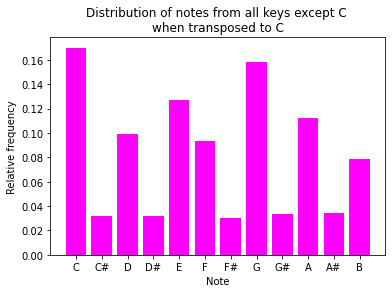

In [7]:
norm_count = np.zeros(12)  # count of normalized (transposed to C) notes
for count, key in zip(x_counts, y_keys):
    norm_count[:] += np.roll(count, -key)  # transpose the counts and add them to the total

dist = norm_count / norm_count.sum()
plt.bar(notes_repr, dist, color='magenta')
plt.title('Distribution of notes from all keys except C \nwhen transposed to C')
plt.ylabel('Relative frequency')
plt.xlabel('Note')
plt.show()

As we can see, the transposed distribution of the notes across all keys (except C meets) the expectation of being mostly composed of C, D, E, F, G, A, B, with very few sharps.

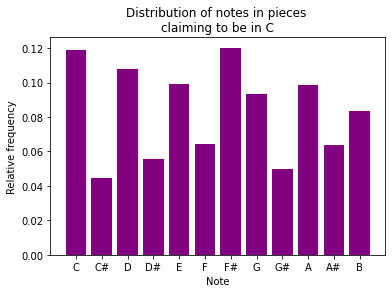

In [8]:
c_counts = np.array(counts)[np.array(keys) == 0].sum(axis=0)
c_dist = c_counts / c_counts.sum()
plt.bar(notes_repr, c_dist, color='purple')
plt.title('Distribution of notes in pieces \nclaiming to be in C')
plt.ylabel('Relative frequency')
plt.xlabel('Note')
plt.show()

However, if we look at the distribution of keys within pieces self-proclaimed to be in C, we notice that some notes like F# have a suspiciously high representation. This is likely because the key of C is the default in many midi-generating programs, and the creators can often forget to change the declared key to the one the piece is actually in, meaning that pieces in the key of C would be very noisy to deal with. However, if the declared key is not C, it most likely means that it was put there deliberately and thus will more likely reflect the actual key of the piece, which we can see by the distribution of notes in non-C keys.

However, C is still the most popular key and not having it in the training data might harm the model's generalizability, so instead of just removing it, we would also add synthetic pieces in C, i.e., choose a random susbset of non-C pieces and transpose them into C, which should provide a valid representation of true C pieces since the distributions of the notes should not differ across keys at all.

In [9]:
# Transpose random subset of pieces to the key of C to make it most common class (as it usually is)
synth_c = np.random.randint(len(y_keys), size=len(y_keys) // 6)
for i in synth_c:
    x_counts[i] = np.roll(x_counts[i], -y_keys[i])
    x_dists[i] = np.roll(x_dists[i], -y_keys[i])
    x_transitions[i] = np.roll(x_transitions[i], -y_keys[i])
    x_trans_dists[i] = np.roll(x_trans_dists[i], -y_keys[i])
    y_keys[i] = 0

In [10]:
(x_count_train, x_count_test,
 x_dist_train, x_dist_test,
 x_trans_train, x_trans_test,
 y_train, y_test,
 y_train_factor, y_test_factor) = train_test_split(x_counts, x_dists, x_trans_dists, y_keys, y_keys_factor,
                                                   test_size=0.1, stratify=y_keys)


In [11]:
def multinomial_log_likelihood(n, p):
    """Log-Likelihood of `n` to occur in a multinomial distribution with probabilities `p`"""
    return gammaln(n.sum() + 1) - gammaln(n + 1).sum() + (n * np.log(p)).sum()


def get_most_likely_p(n, ps):
    """Returns the index of the most likely source of `n` out of multinomial distributions with parameters in `ps`"""
    return np.array([multinomial_log_likelihood(n, p) for p in ps]).argmax()


def predict_single(dist, counts):
    """Returns the most likely source of `counts` for each of 12 keys"""
    ps = [np.roll(dist, i) for i in range(12)]  # p for each of 12 keys
    return get_most_likely_p(counts, ps)


def predict(dist, counts_list):
    """Returns the most likely key of each of the note counts"""
    ps = [np.roll(dist, i) for i in range(12)]  # p for each of 12 keys
    return np.array([get_most_likely_p(n, ps) for n in counts_list])

## Testing and Analysis

To test the performance of the models, we need to consider what it is that we are care most about. For example, if we cared equally about making accurate prediction for each of the keys (not based on their popularity) and wanted the metric to reflect that, for example, it doesn't work well for some keys, we would've used a macro-average F-1 score, which simply averages each key's F-1 scores. However, practically speaking, if some keys aren't popular, we should be fine letting the model be less effective with them, as long as the most popular keys are served well. So, to adjust for that, we can use a micro-average F-1 score, which would combine true positives and false positives/negatives from all classes, thus accounting for the class imbalance.

A more intuitive alternative would be to use accuracy, the main disadvantage of which is that it can be misleading under class imbalance since the model would achieve a high accuracy by simply classifying all samples to belong to the most common class (which can also happen with F-1 scores). So, arguably the most reliable classification metric would be the Matthews correlation coefficient (ranging from -1 to 1) which would help us detect when our classification model is being better ($c>0$) or worse ($c<0$) than a random classifier. 

So, we can rely on the correlation coefficient to assess how much the model actually improves the chance of choosing the correct key while using accuracy as a holistic and more intuitive metric of how often we should expect the model to actually be correct.


In [15]:
y_train_pred = predict(dist, x_count_train)
y_test_pred = predict(dist, x_count_test)

print('Multinomial MLE performance\n')
print('Train Accuracy:', accuracy_score(y_train_pred, y_train_pred), sep='\t')
print()
print('Test  Accuracy:', accuracy_score(y_test, y_test_pred), sep='\t')
print('Test  r =', matthews_corrcoef(y_test, y_test_pred), sep='\t')

Multinomial MLE performance

Train Accuracy:	1.0

Test  Accuracy:	0.8508744038155803
Test  r =	0.8255927355207873


As we can see, the MLE approach achieves an accuracy of over 85%, which is a pretty remarkable result for such a simple model. This can be explained by the fact that this model have operated under a plausible assumption about the source distribution of the data - that frequencies of a note in a key are similar across all pieces and do not depend on frequencies of other notes -  which turned out to represent the real phenomenon pretty well. 

## Appendix: Application Example

There are multiple applications for automated key detection, one of which is automatic transposition to a desired key. Many (especially compact) musical instruments by default are tailored to one specific key (normally C) and playing other keys is either difficult (due to inconvenience of fingering) or impossible (due to lack of necessary notes). So, if somebody wants to play a song in the key of Fm on a harmonic (normally in C with no sharps), after downloading the respective midi file, they would have to manually figure out what key it is in, and then manually transpose the piece to C. So, a small util that would rely on our key detection mechanism and automatically transpose the given piece to a desired key would simplify that process a lot.


In [16]:
def auto_transpose(midi_file, output_file='out.mid', target_key='C', current_key=None):
    target_key = notes_repr_inv[target_key]
    midi = mido.MidiFile(midi_file)
    if current_key is None:  # key of the piece not provided
        counts, _, keys = get_midi_data(midi)
        if len(keys) == 1 and keys[0] != 0:  # found key information in the midi, use it
            current_key = keys[0]
        else:  # predict the key
            current_key = predict_single(dist, counts)
    # find direction requiring moving by less notes
    transpose_by = min(target_key - current_key, target_key - current_key - 12, target_key - current_key + 12,
                       key=lambda x: abs(x))
    for track in midi.tracks:
        for message in track:
            if message.type == "key_signature":  # set the key to the target one
                message.key = notes_repr[target_key]
            elif message.type == "note_on":  # transpose all note keys
                message.note = message.note + transpose_by
    midi.save(output_file)

For example, here's a song claiming to be in C while obviously being not in C because of the prevalence of sharps from the visible very beginning:

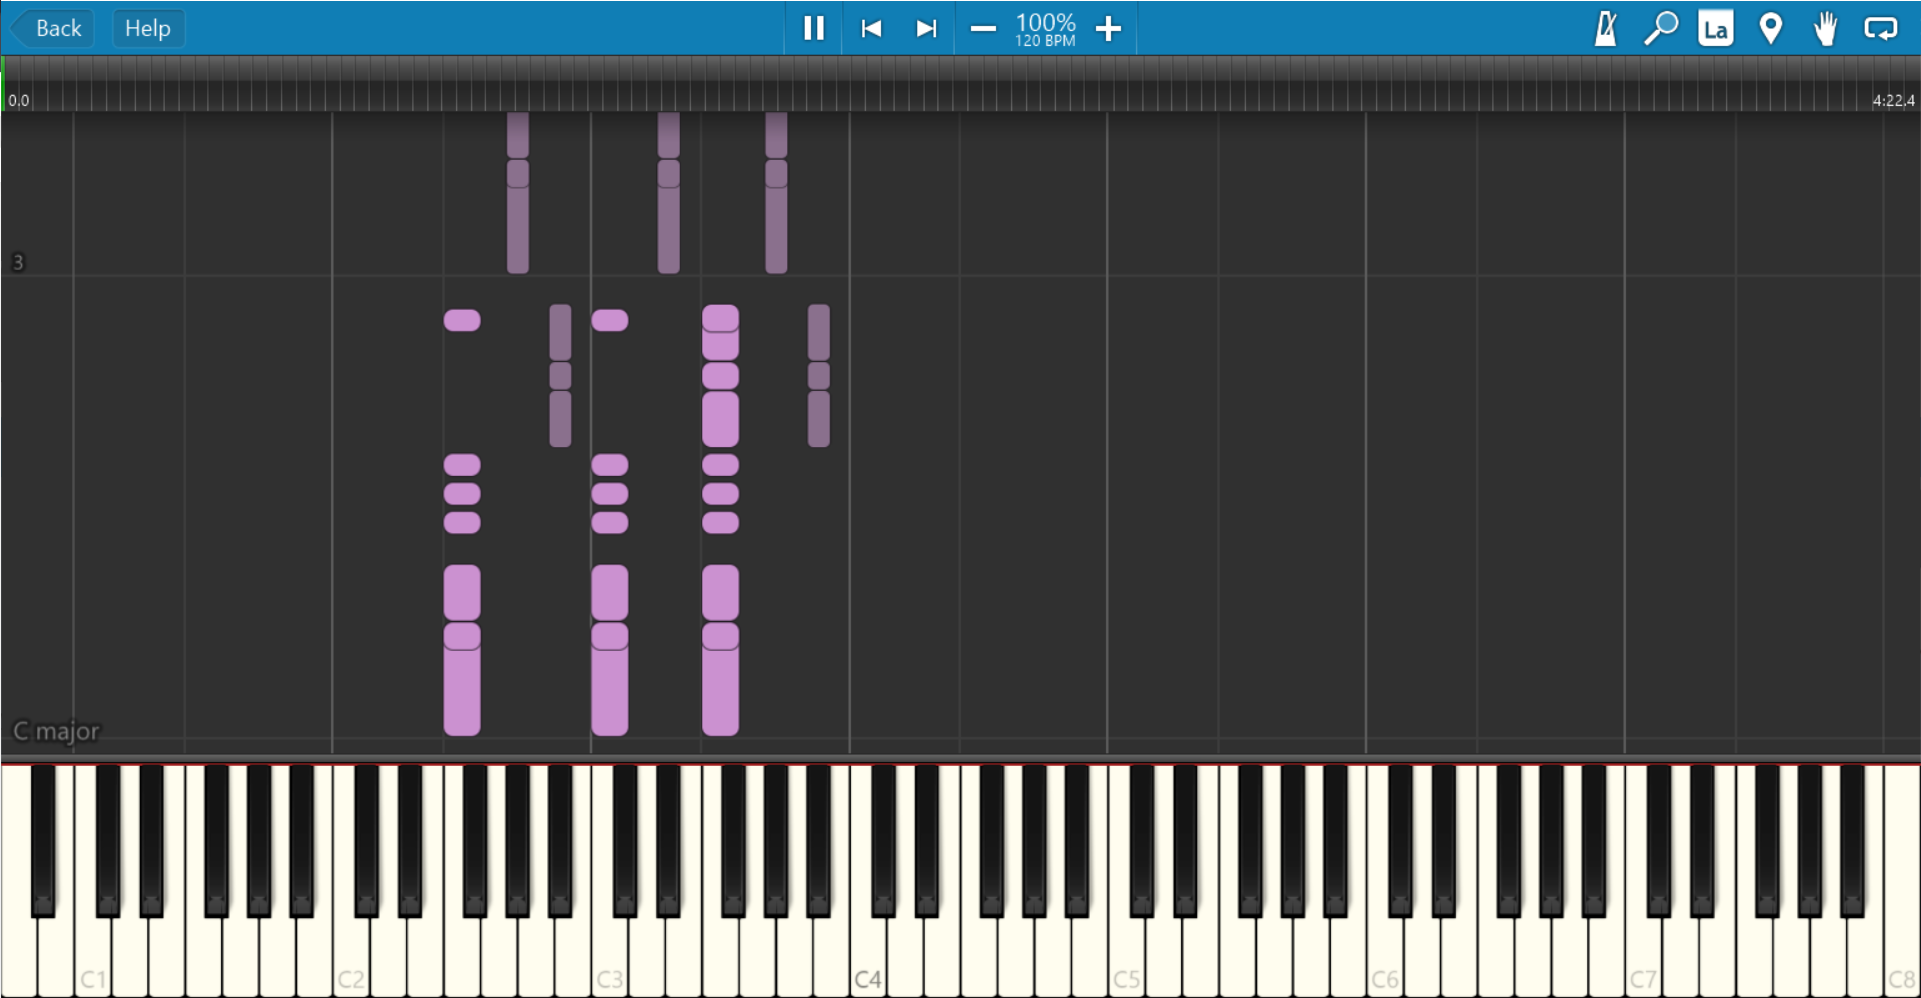

In [17]:
from IPython.display import Image
Image(filename='untransposed.png') 

In [18]:
auto_transpose(r'C:\Users\breedoon\Downloads\Midis\N\N\nirvana-smells_like_teen_spirit.mid')

And after transposing it, the song does appear to be in C:

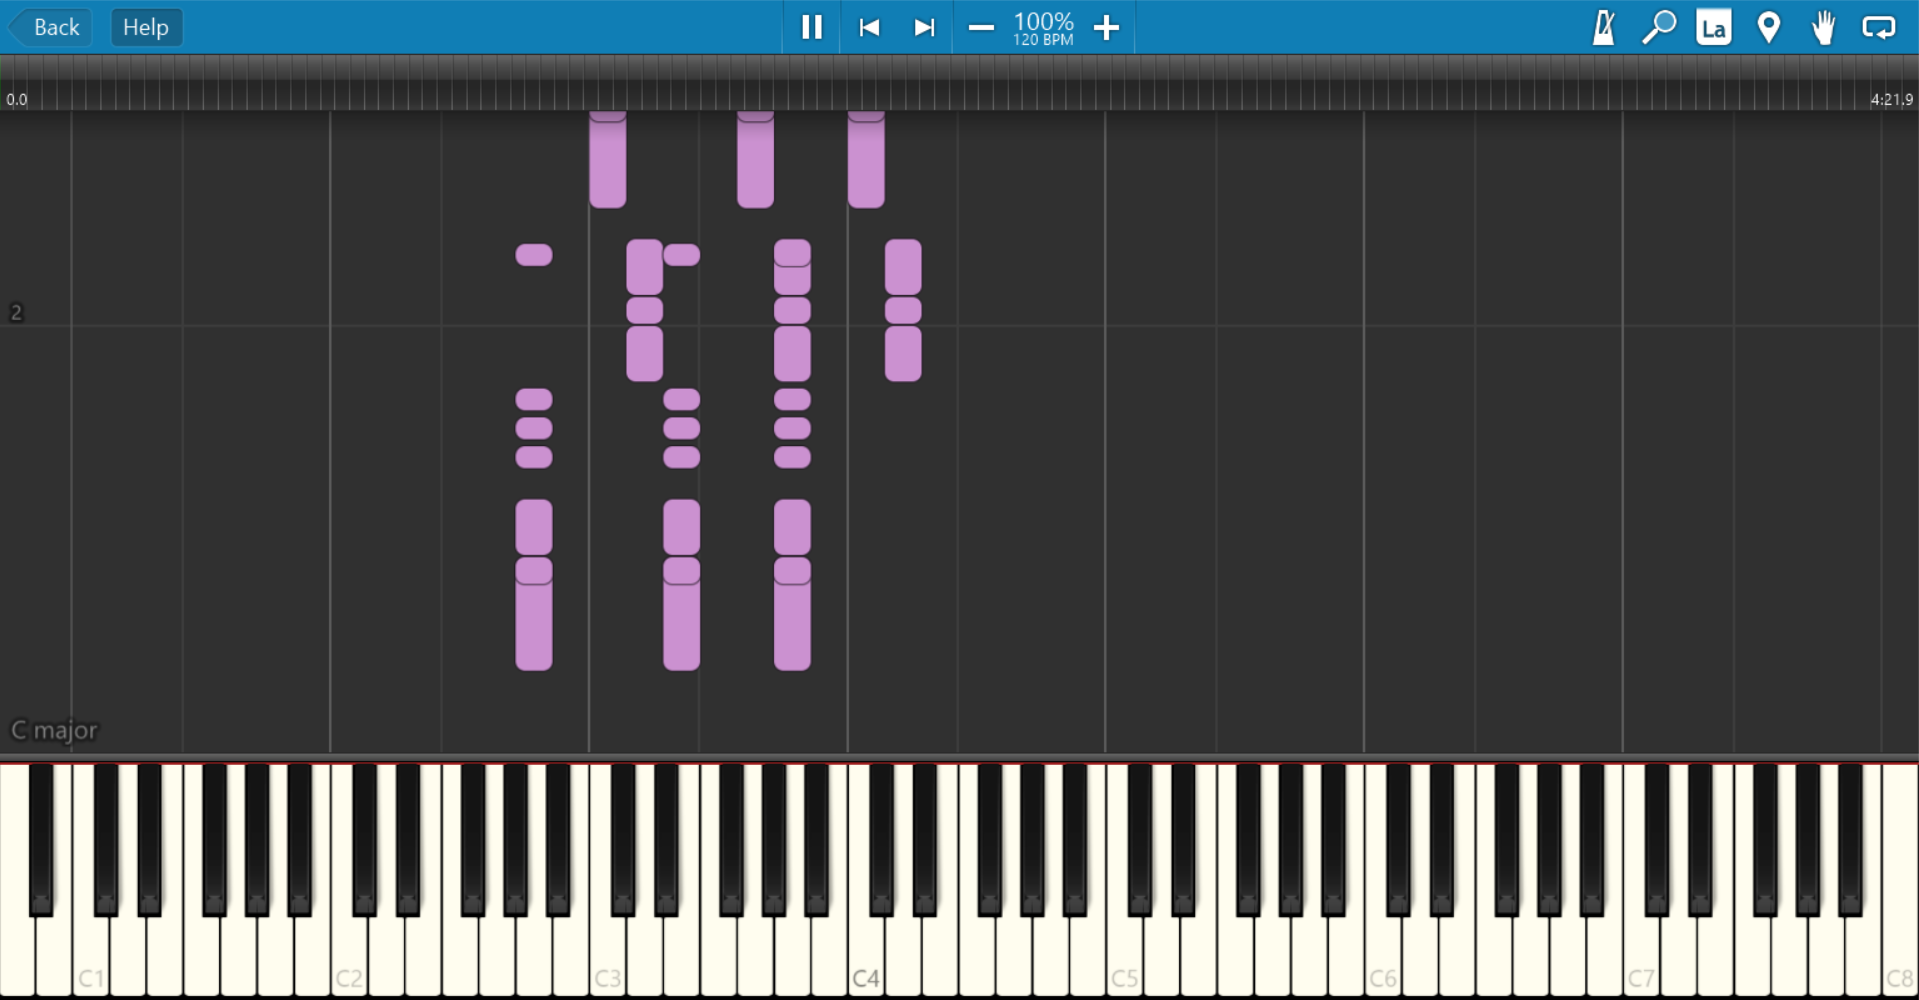

In [19]:
Image(filename='transposed.png') 